Import Libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

Load Data

In [77]:
df = pd.read_csv('lung_cancer_prediction_dataset.csv')
origin = df
df.head()

,ID,Country,Population_Size,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,...,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Developed_or_Developing,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
0,0,China,1400,80,Male,Yes,30,29,No,No,...,Low,Yes,No,Poor,No,NaN,Developing,690000,2.44,0.0
1,1,Iran,84,53,Male,No,0,0,Yes,No,...,Low,Yes,No,Poor,No,NaN,Developing,27000,2.10,0.0
2,2,Mexico,128,47,Male,Yes,12,6,Yes,No,...,Medium,No,No,Poor,Yes,NaN,Developing,28000,1.11,0.0
3,3,Indonesia,273,39,Female,No,0,0,No,Yes,...,Low,No,No,Poor,No,NaN,Developing,40000,0.75,0.0
4,4,South Africa,59,44,Female,No,0,0,Yes,No,...,Medium,Yes,No,Poor,No,NaN,Developing,15000,2.44,0.0


Data Cleaning

In [78]:
df.drop(columns=['ID'],inplace=True)

In [79]:
df.columns

Index(['Country', 'Population_Size', 'Age', 'Gender', 'Smoker',
       'Years_of_Smoking', 'Cigarettes_per_Day', 'Passive_Smoker',
       'Family_History', 'Lung_Cancer_Diagnosis', 'Cancer_Stage',
       'Survival_Years', 'Adenocarcinoma_Type', 'Air_Pollution_Exposure',
       'Occupational_Exposure', 'Indoor_Pollution', 'Healthcare_Access',
       'Early_Detection', 'Treatment_Type', 'Developed_or_Developing',
       'Annual_Lung_Cancer_Deaths', 'Lung_Cancer_Prevalence_Rate',
       'Mortality_Rate'],
      dtype='object')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220632 entries, 0 to 220631
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      220632 non-null  object 
 1   Population_Size              220632 non-null  int64  
 2   Age                          220632 non-null  int64  
 3   Gender                       220632 non-null  object 
 4   Smoker                       220632 non-null  object 
 5   Years_of_Smoking             220632 non-null  int64  
 6   Cigarettes_per_Day           220632 non-null  int64  
 7   Passive_Smoker               220632 non-null  object 
 8   Family_History               220632 non-null  object 
 9   Lung_Cancer_Diagnosis        220632 non-null  object 
 10  Cancer_Stage                 8961 non-null    object 
 11  Survival_Years               220632 non-null  int64  
 12  Adenocarcinoma_Type          220632 non-null  object 
 13 

In [81]:
df.isna().sum()   #cancer stage -> 252 NAN  , tratment stage -> 2549

Country                             0
Population_Size                     0
Age                                 0
Gender                              0
Smoker                              0
Years_of_Smoking                    0
Cigarettes_per_Day                  0
Passive_Smoker                      0
Family_History                      0
Lung_Cancer_Diagnosis               0
Cancer_Stage                   211671
Survival_Years                      0
Adenocarcinoma_Type                 0
Air_Pollution_Exposure              0
Occupational_Exposure               0
Indoor_Pollution                    0
Healthcare_Access                   0
Early_Detection                     0
Treatment_Type                 213968
Developed_or_Developing             0
Annual_Lung_Cancer_Deaths           0
Lung_Cancer_Prevalence_Rate         0
Mortality_Rate                      0
dtype: int64

In [82]:
df.nunique()

Country                          25
Population_Size                  25
Age                              66
Gender                            2
Smoker                            2
Years_of_Smoking                 41
Cigarettes_per_Day               27
Passive_Smoker                    2
Family_History                    2
Lung_Cancer_Diagnosis             2
Cancer_Stage                      4
Survival_Years                   11
Adenocarcinoma_Type               2
Air_Pollution_Exposure            3
Occupational_Exposure             2
Indoor_Pollution                  2
Healthcare_Access                 2
Early_Detection                   2
Treatment_Type                    3
Developed_or_Developing           2
Annual_Lung_Cancer_Deaths      8079
Lung_Cancer_Prevalence_Rate     201
Mortality_Rate                 2849
dtype: int64

In [83]:
df.duplicated().sum()  #252
df.drop_duplicates(inplace=True)   #clear duplicates

In [84]:
df.isna().sum()

Country                             0
Population_Size                     0
Age                                 0
Gender                              0
Smoker                              0
Years_of_Smoking                    0
Cigarettes_per_Day                  0
Passive_Smoker                      0
Family_History                      0
Lung_Cancer_Diagnosis               0
Cancer_Stage                   211419
Survival_Years                      0
Adenocarcinoma_Type                 0
Air_Pollution_Exposure              0
Occupational_Exposure               0
Indoor_Pollution                    0
Healthcare_Access                   0
Early_Detection                     0
Treatment_Type                 213716
Developed_or_Developing             0
Annual_Lung_Cancer_Deaths           0
Lung_Cancer_Prevalence_Rate         0
Mortality_Rate                      0
dtype: int64

In [85]:
# drop nulls
df = df[~((df['Lung_Cancer_Diagnosis'] == 'Yes') & (df['Treatment_Type'].isna()))]

In [86]:
df.isna().sum() # no nulls in data

Country                             0
Population_Size                     0
Age                                 0
Gender                              0
Smoker                              0
Years_of_Smoking                    0
Cigarettes_per_Day                  0
Passive_Smoker                      0
Family_History                      0
Lung_Cancer_Diagnosis               0
Cancer_Stage                   211419
Survival_Years                      0
Adenocarcinoma_Type                 0
Air_Pollution_Exposure              0
Occupational_Exposure               0
Indoor_Pollution                    0
Healthcare_Access                   0
Early_Detection                     0
Treatment_Type                 211419
Developed_or_Developing             0
Annual_Lung_Cancer_Deaths           0
Lung_Cancer_Prevalence_Rate         0
Mortality_Rate                      0
dtype: int64

In [87]:
df.describe()

,Population_Size,Age,Years_of_Smoking,Cigarettes_per_Day,Survival_Years,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
count,218083.000000,218083.000000,218083.000000,218083.000000,218083.000000,218083.000000,218083.000000,218083.000000
mean,229.966467,52.515606,8.121477,6.963459,0.166707,63993.387137,1.502231,2.295266
std,349.501432,19.077421,12.353470,9.788574,1.064998,130813.104913,0.577971,13.015847
min,54.000000,20.000000,0.000000,0.000000,0.000000,10005.000000,0.500000,0.000000
25%,83.000000,36.000000,0.000000,0.000000,0.000000,23000.000000,1.000000,0.000000
50%,113.000000,53.000000,0.000000,0.000000,0.000000,30000.000000,1.500000,0.000000
75%,206.000000,69.000000,15.000000,14.000000,0.000000,45000.000000,2.000000,0.000000
max,1400.000000,85.000000,40.000000,30.000000,10.000000,690000.000000,2.500000,90.000000


In [88]:
df.describe(include='object')

,Country,Gender,Smoker,Passive_Smoker,Family_History,Lung_Cancer_Diagnosis,Cancer_Stage,Adenocarcinoma_Type,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Developed_or_Developing
count,218083,218083,218083,218083,218083,218083,6664,218083,218083,218083,218083,218083,218083,6664,218083
unique,25,2,2,2,2,2,4,2,3,2,2,2,2,3,2
top,Japan,Female,No,No,No,No,Stage 4,No,Medium,No,No,Poor,No,Surgery,Developing
freq,8876,109342,131327,152865,185613,211419,1783,119716,108863,152266,167611,174499,157068,2272,165791


In [89]:
df['Lung_Cancer_Diagnosis'].value_counts() #not balanced

Lung_Cancer_Diagnosis
No     211419
Yes      6664
Name: count, dtype: int64

In [90]:
df['Cancer_Stage'].value_counts() 

Cancer_Stage
Stage 4    1783
Stage 1    1644
Stage 2    1634
Stage 3    1603
Name: count, dtype: int64

In [91]:
df['Treatment_Type'].value_counts()

Treatment_Type
Surgery         2272
Radiotherapy    2250
Chemotherapy    2142
Name: count, dtype: int64

In [92]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['Country', 'Gender', 'Smoker', 'Passive_Smoker', 'Family_History',
       'Lung_Cancer_Diagnosis', 'Cancer_Stage', 'Adenocarcinoma_Type',
       'Air_Pollution_Exposure', 'Occupational_Exposure', 'Indoor_Pollution',
       'Healthcare_Access', 'Early_Detection', 'Treatment_Type',
       'Developed_or_Developing'],
      dtype='object')

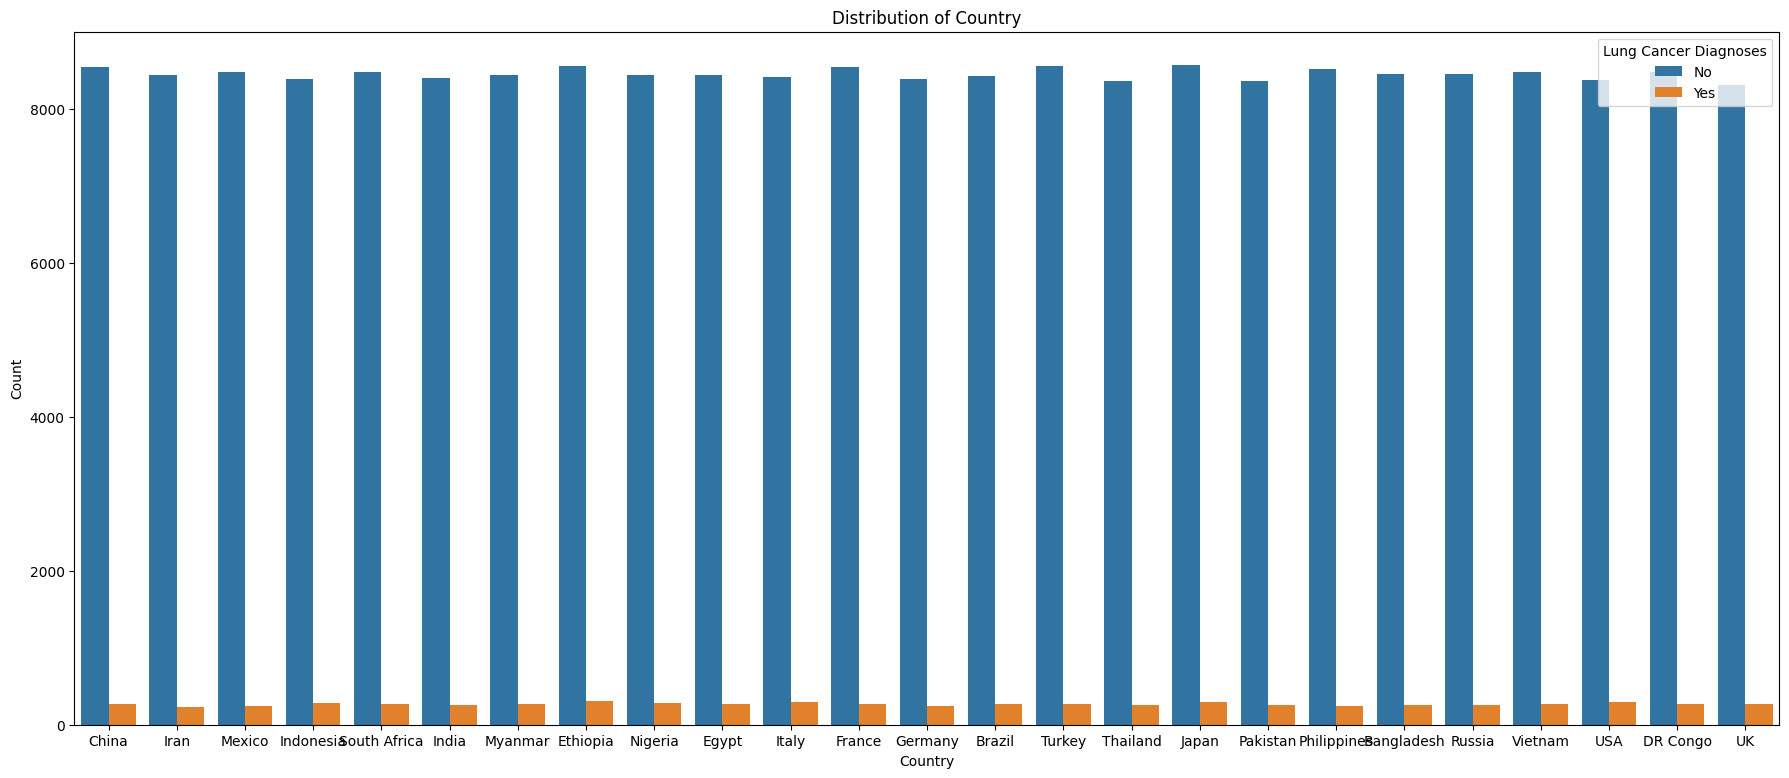

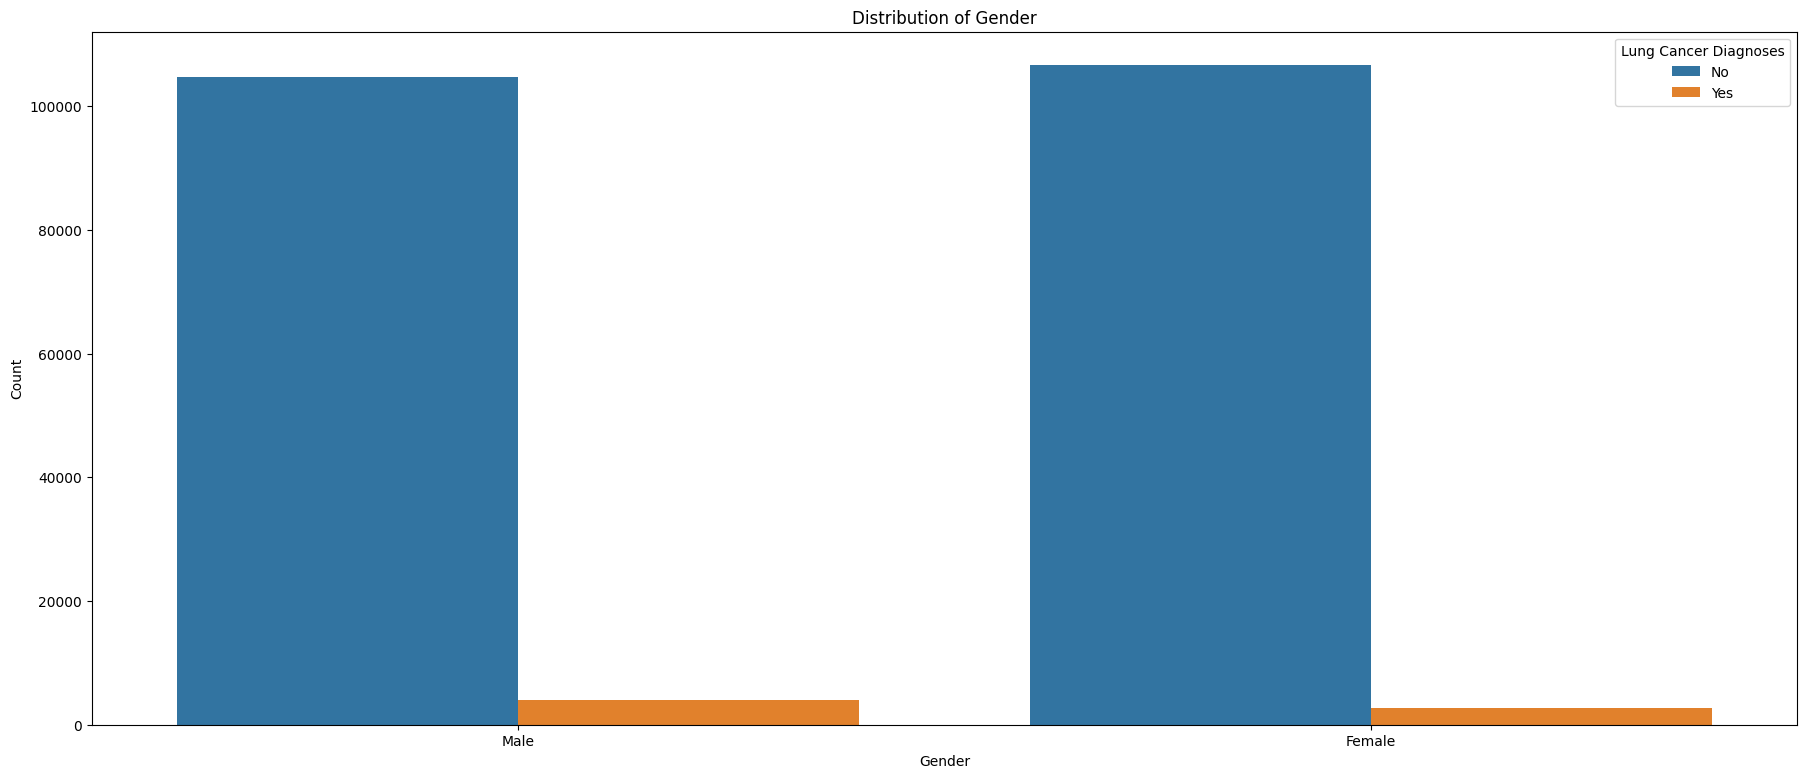

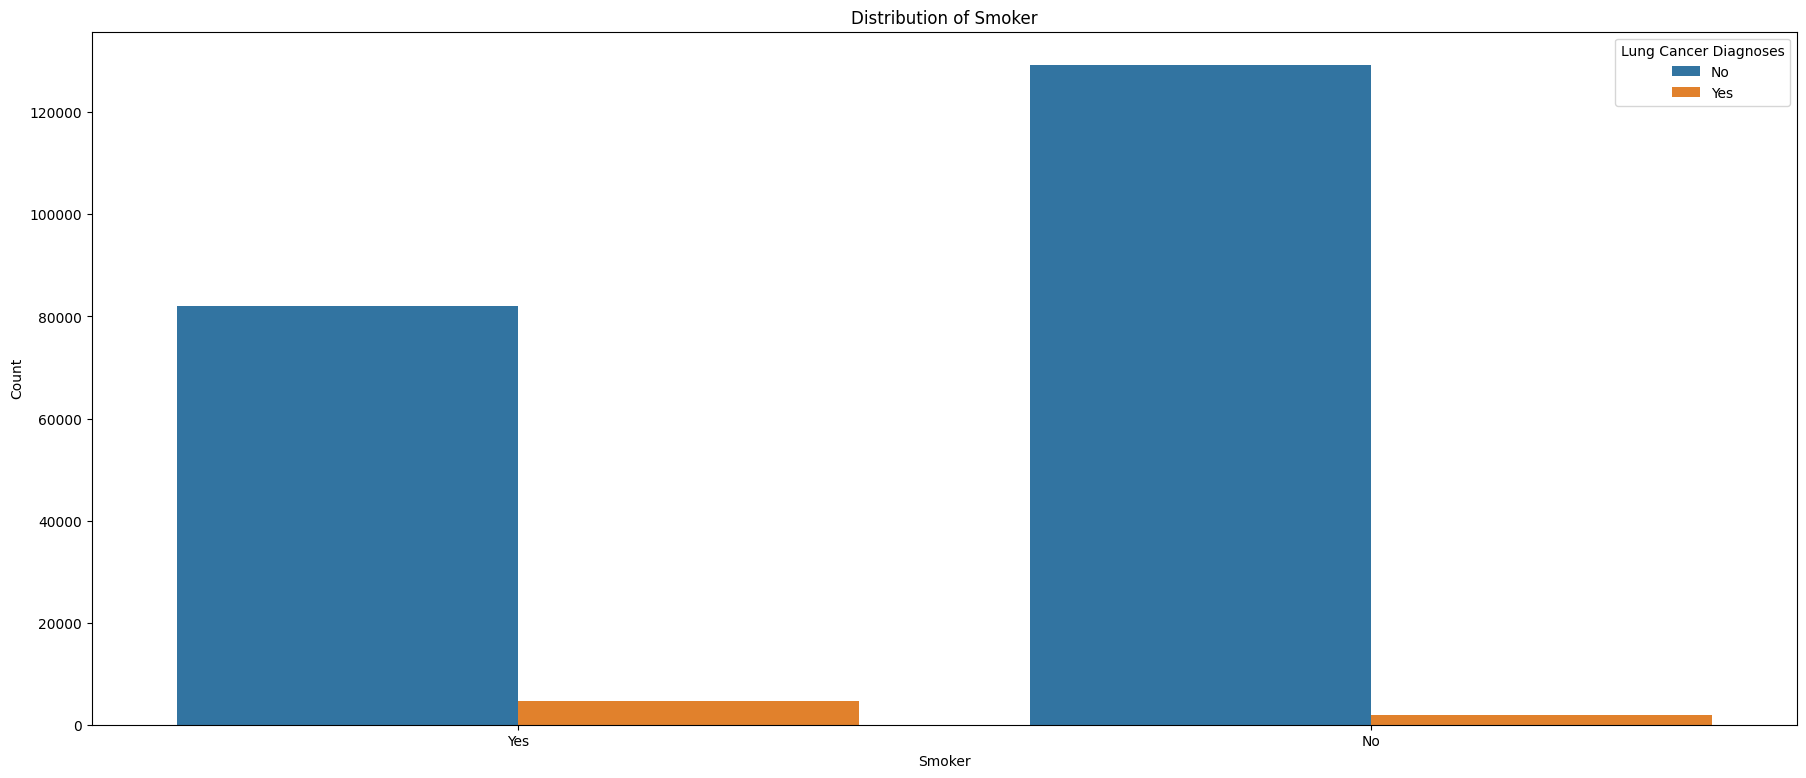

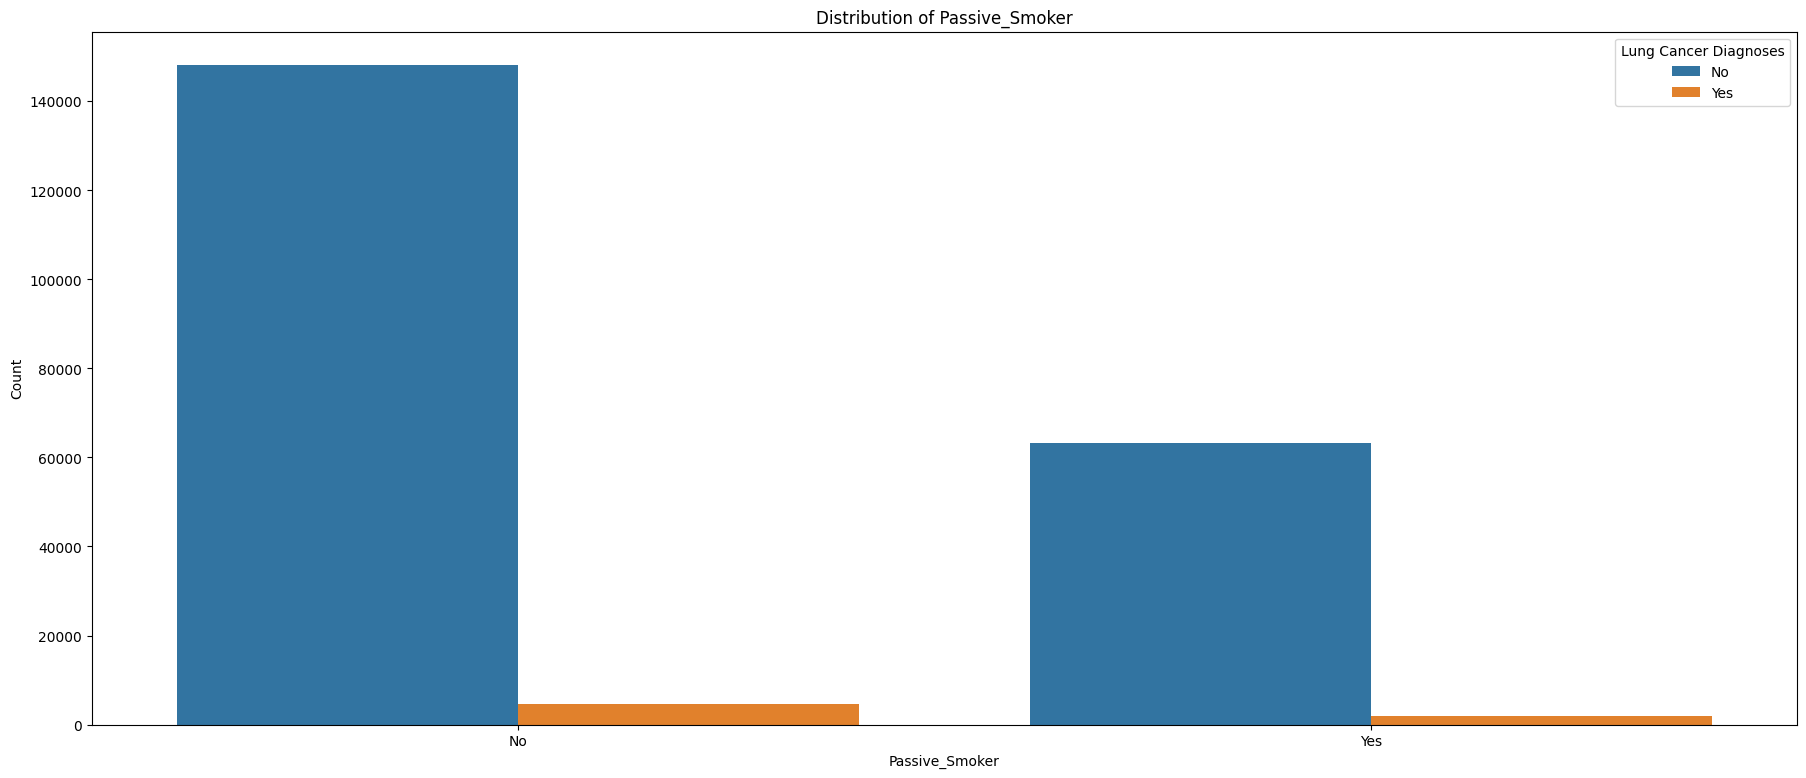

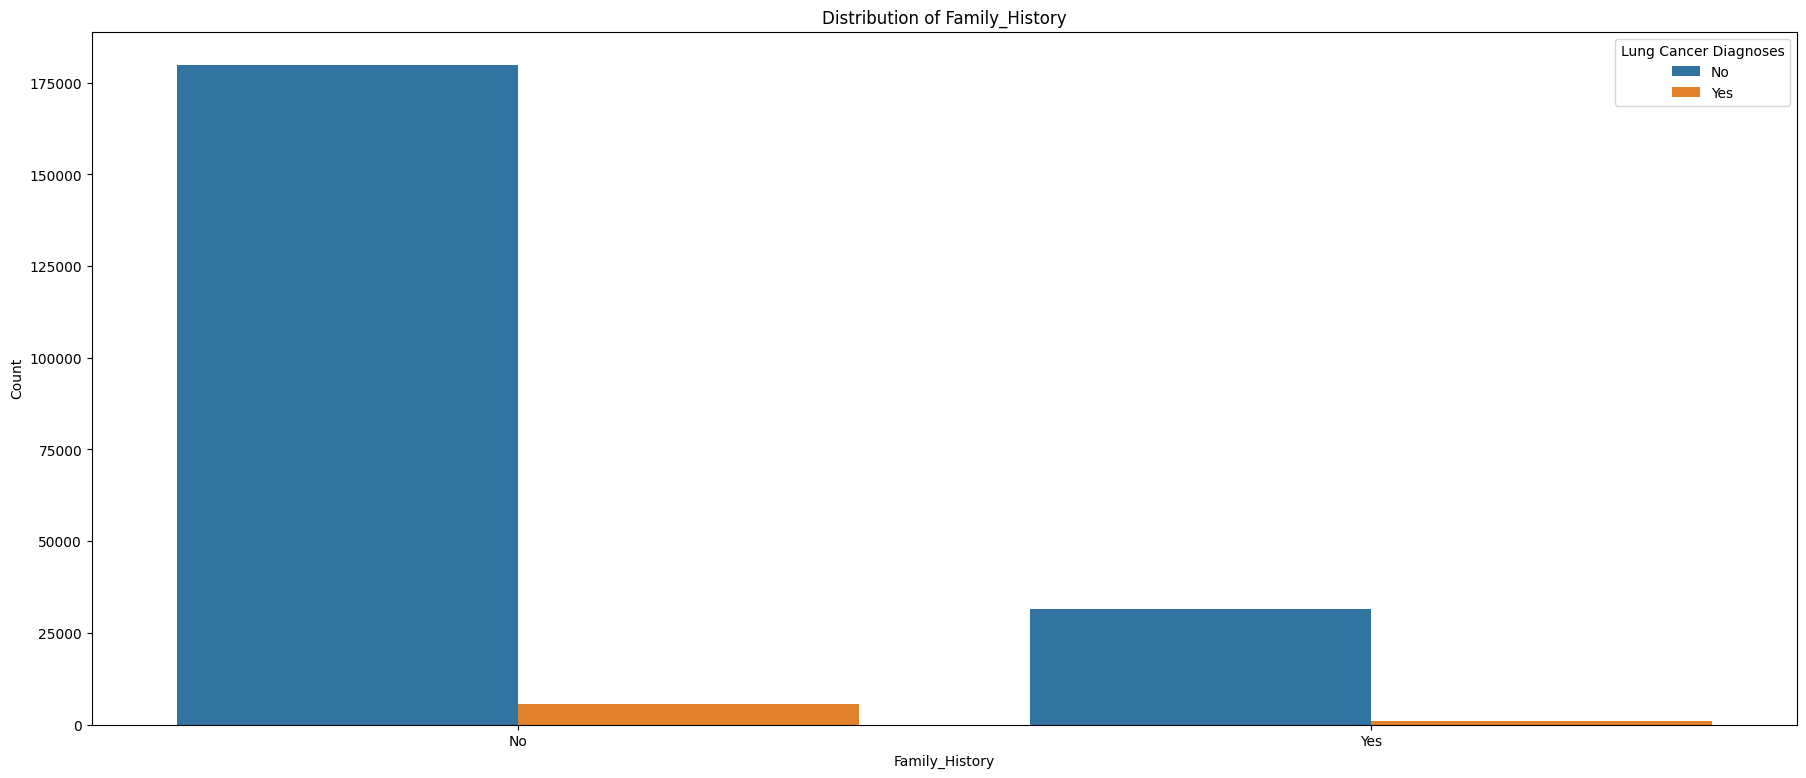

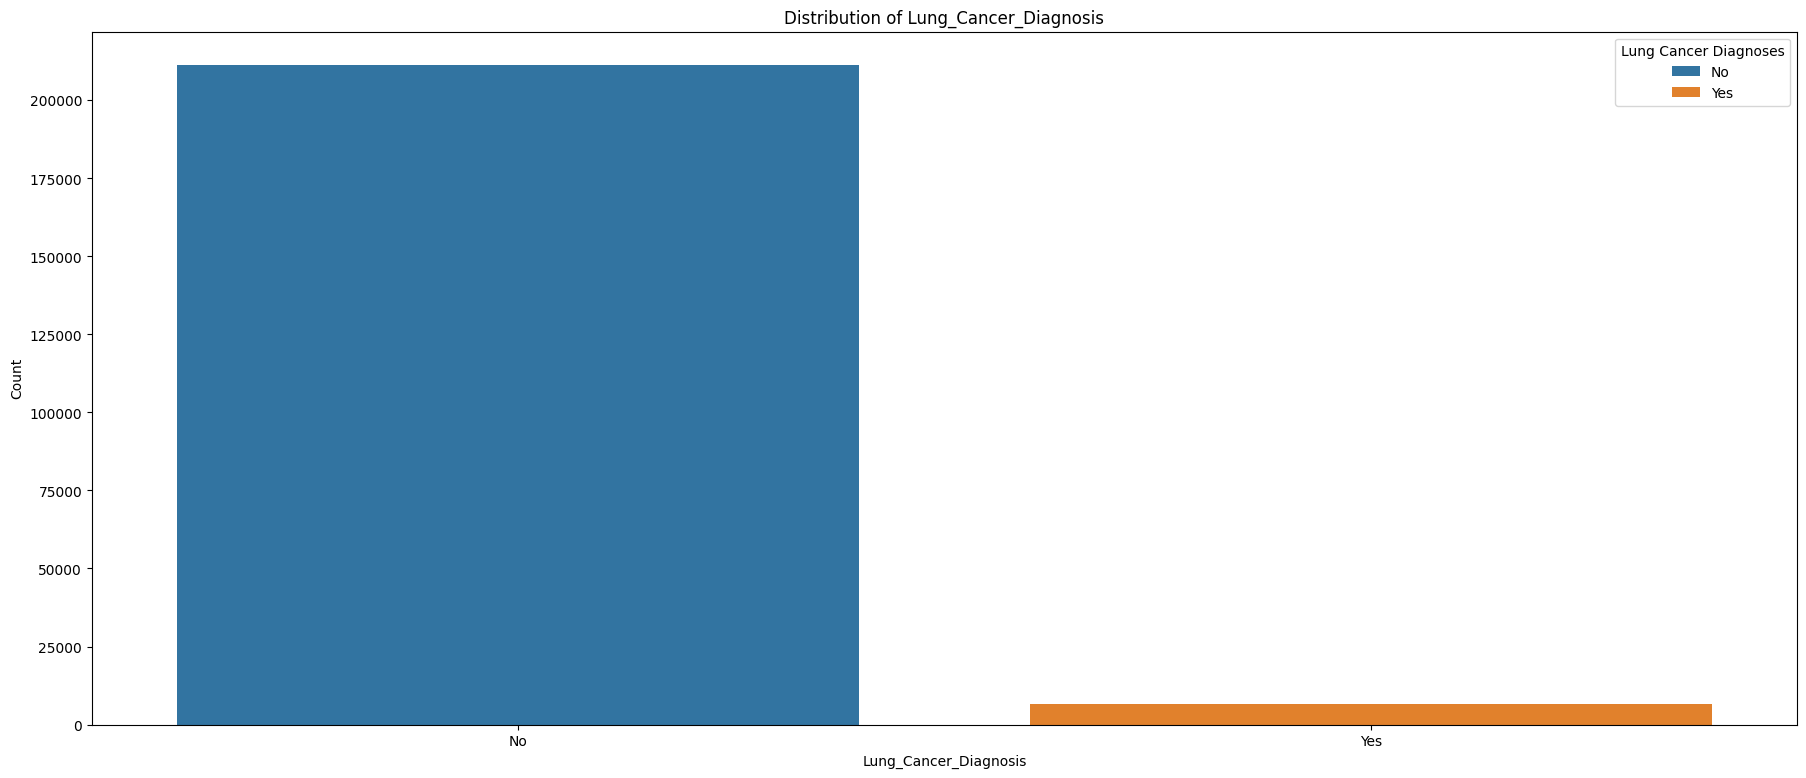

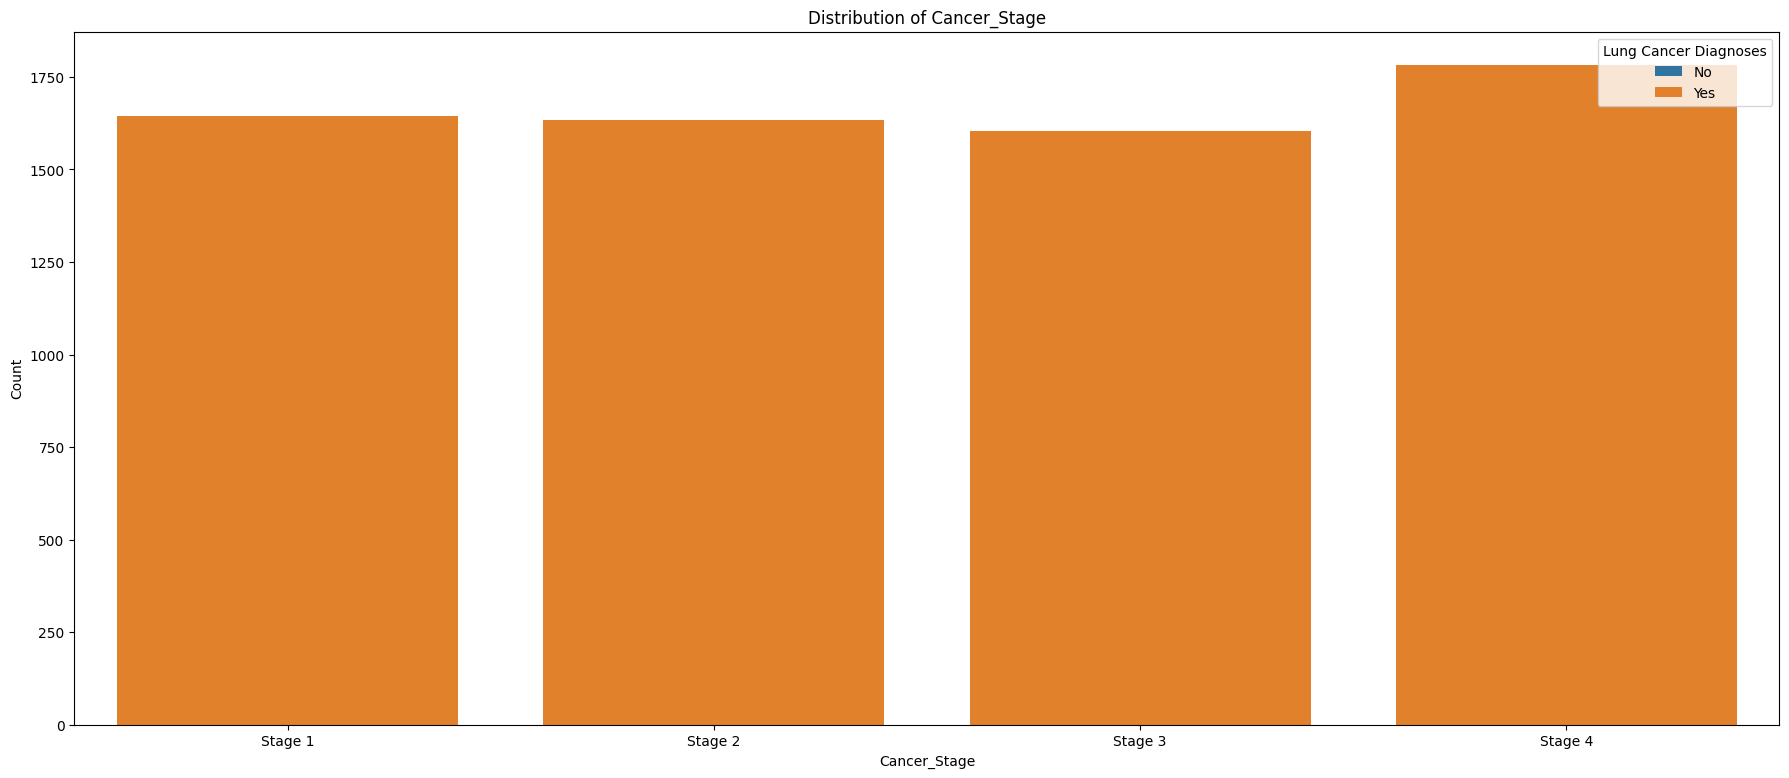

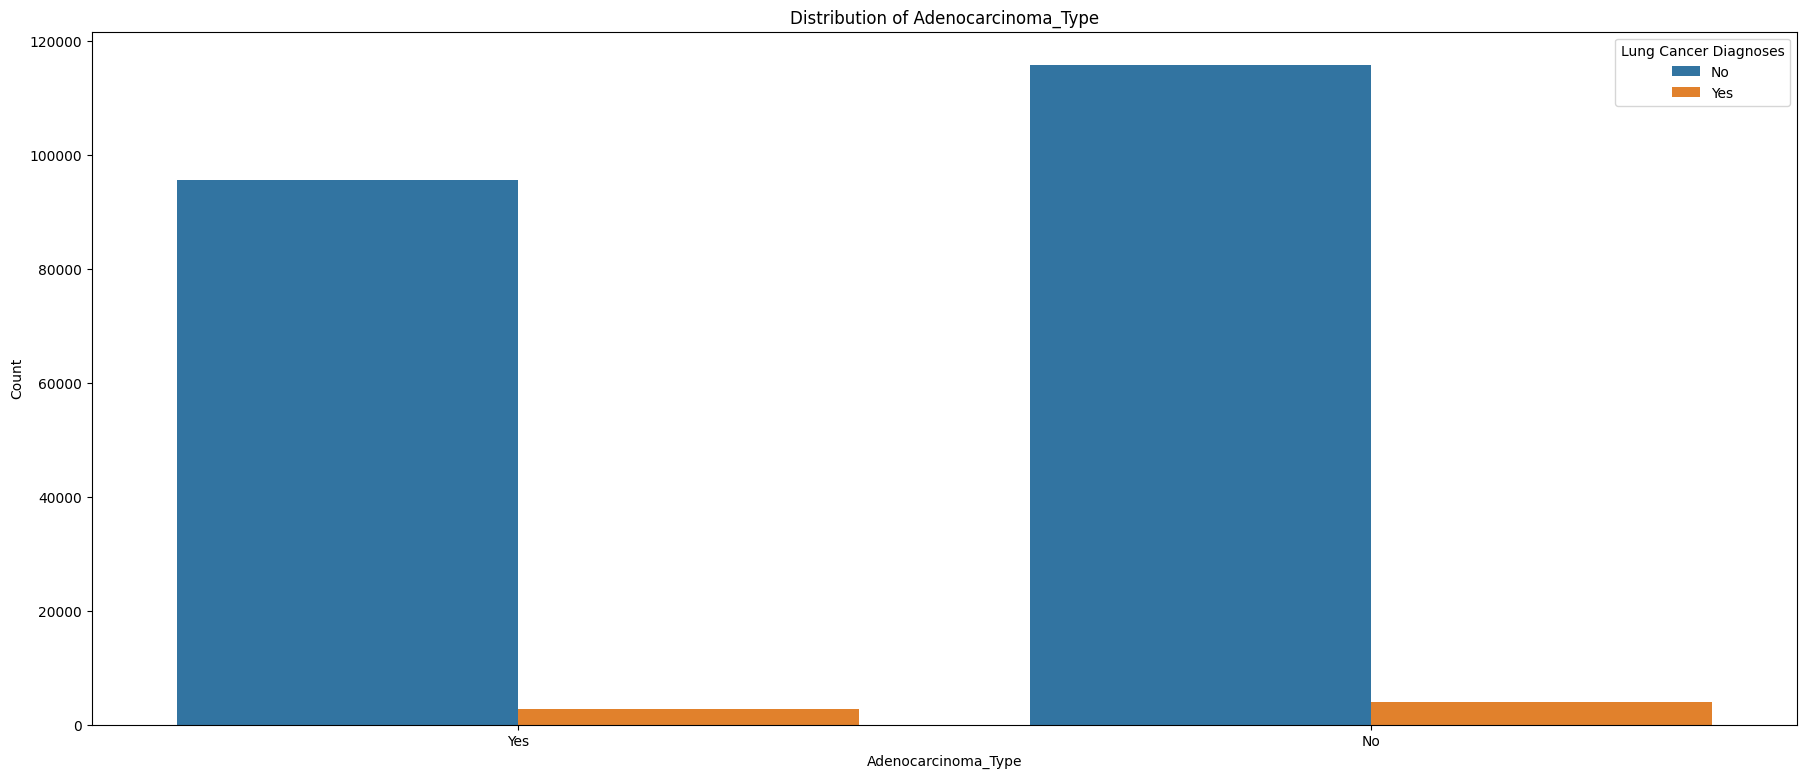

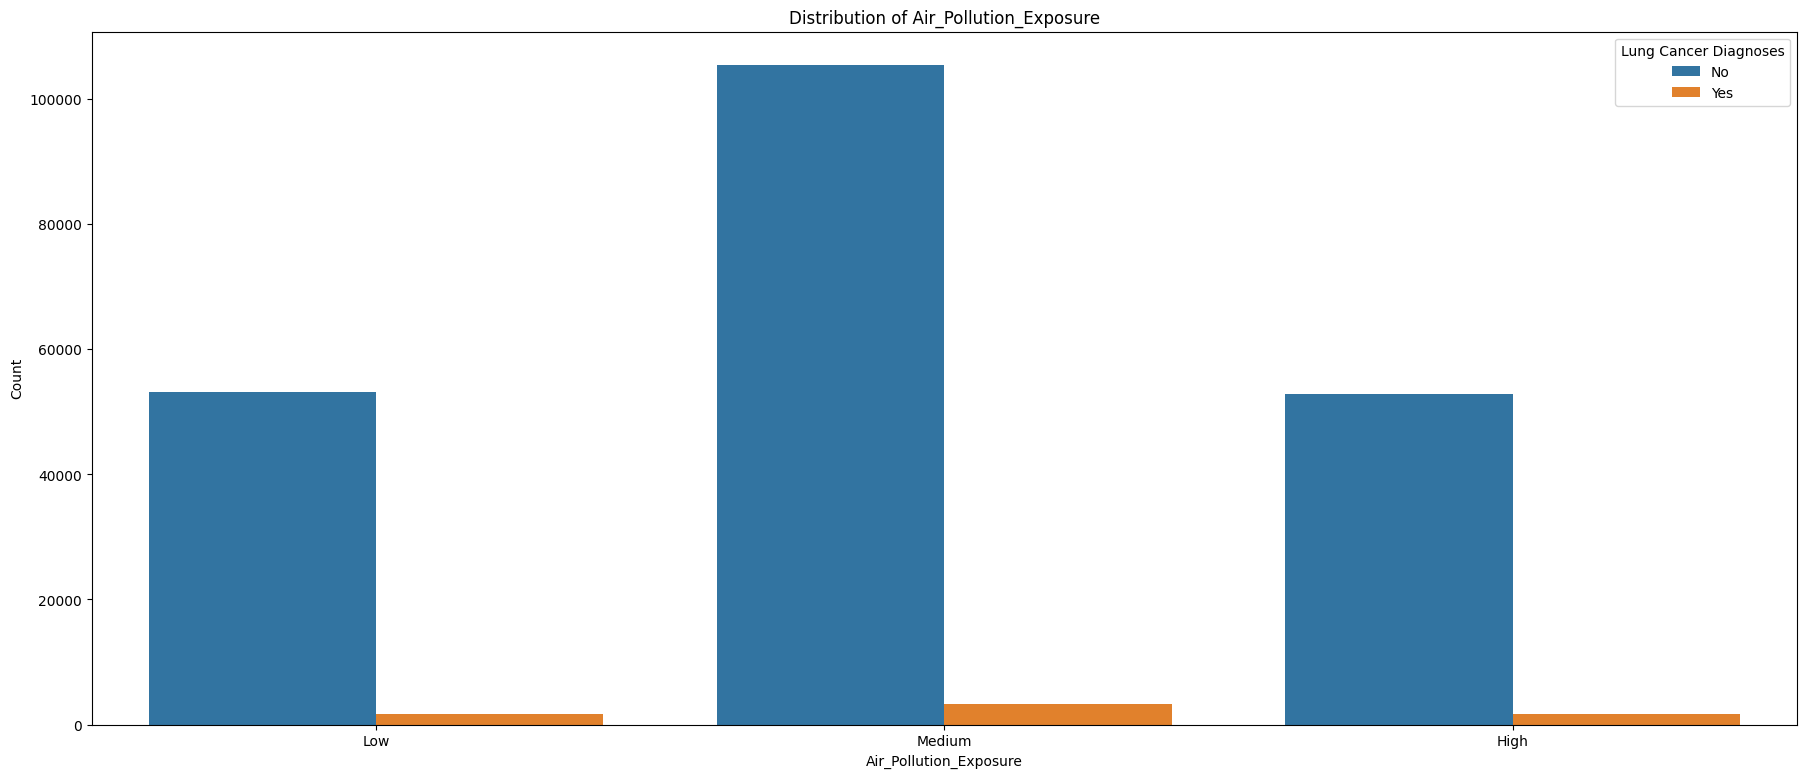

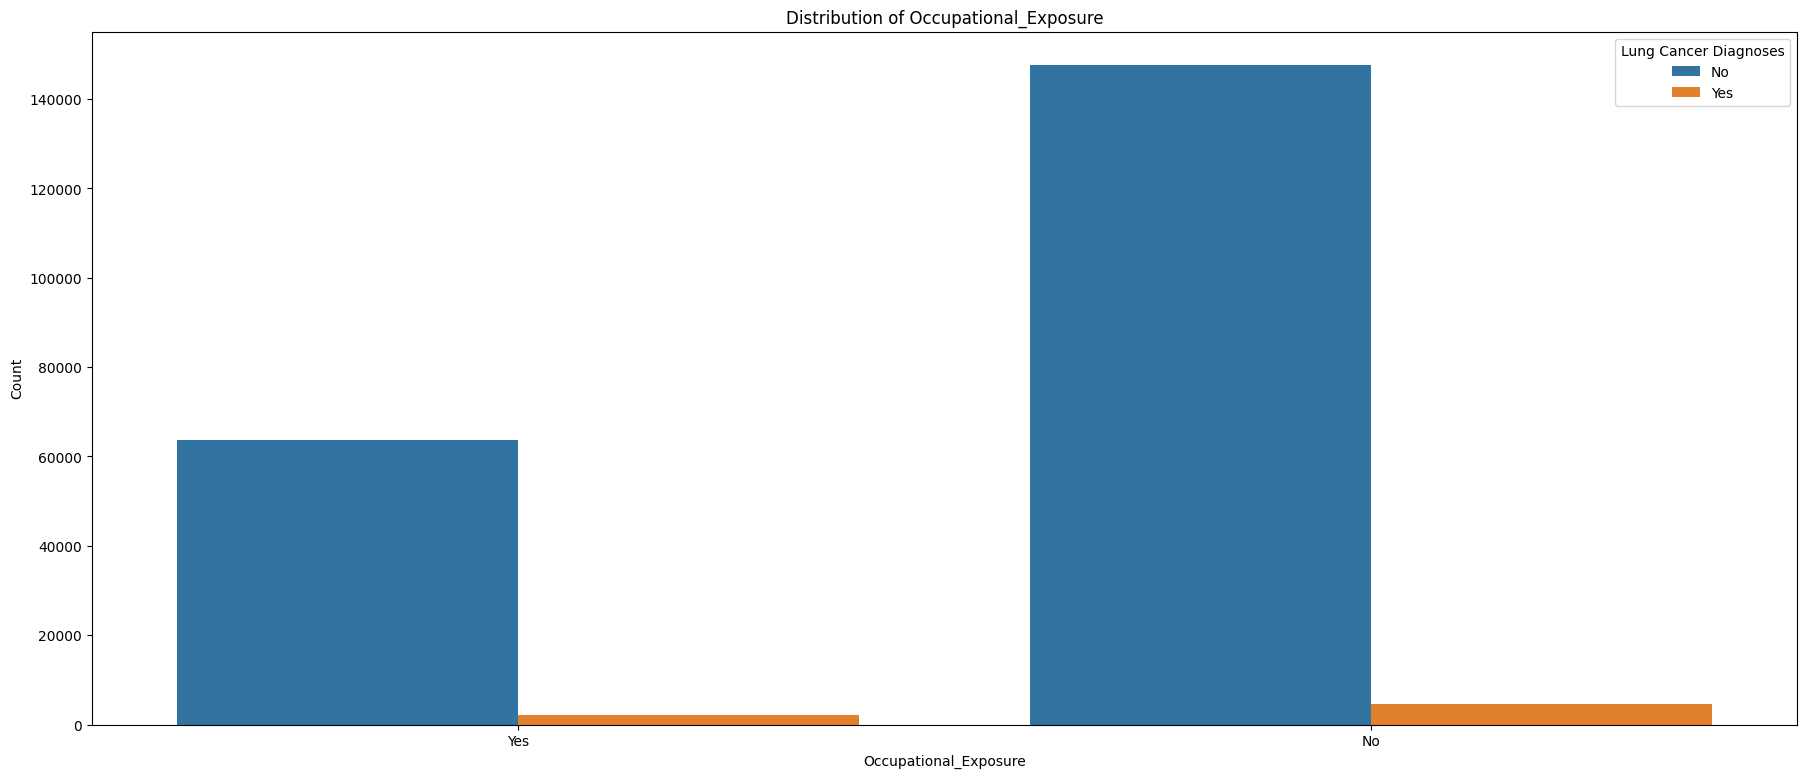

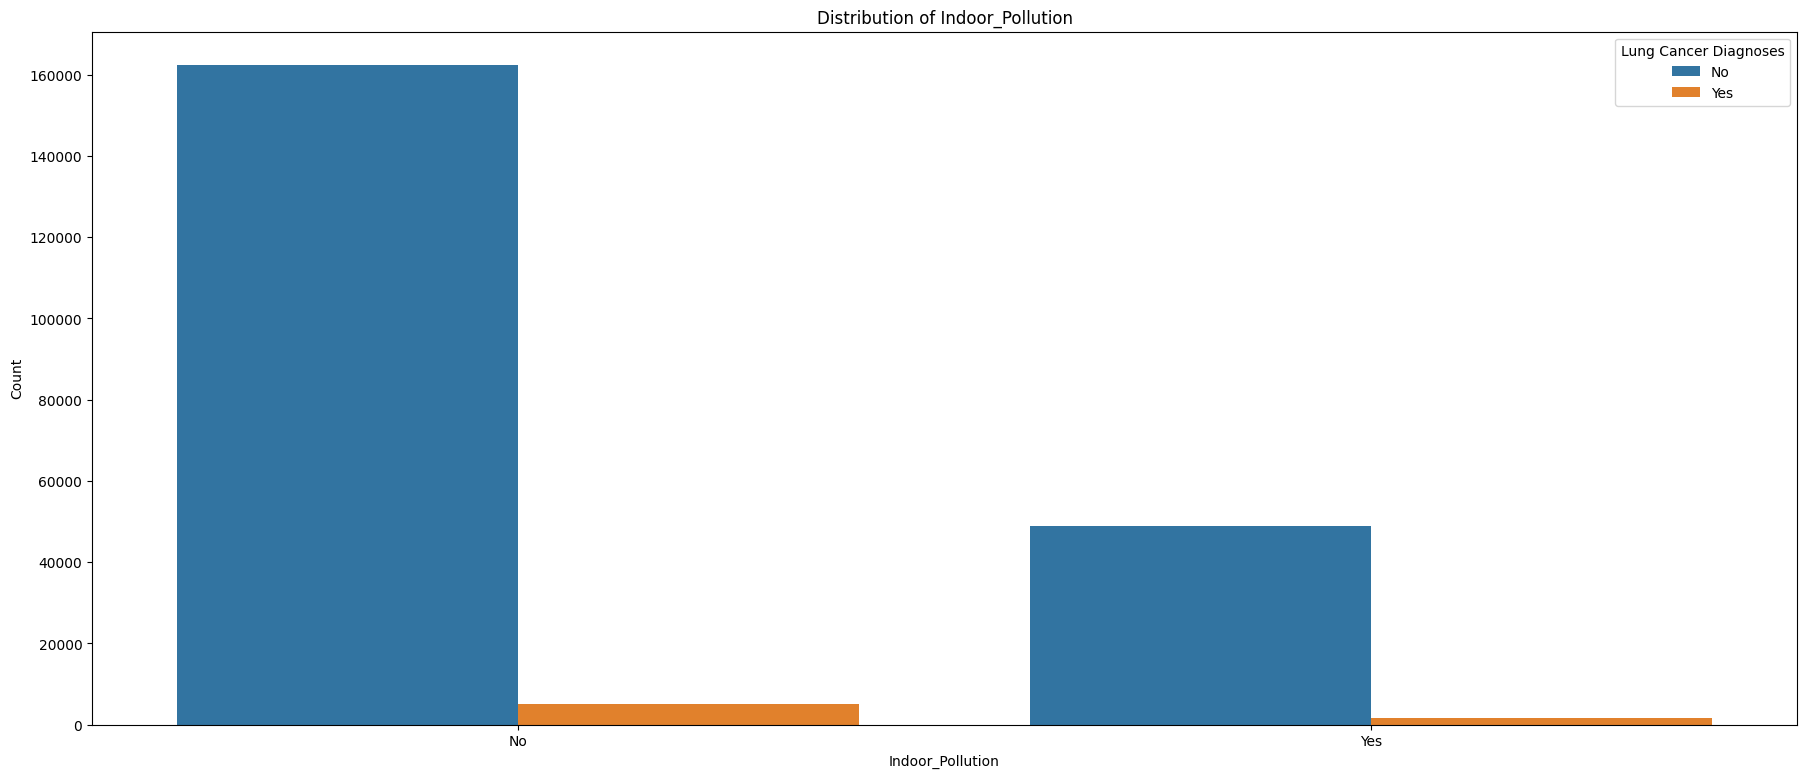

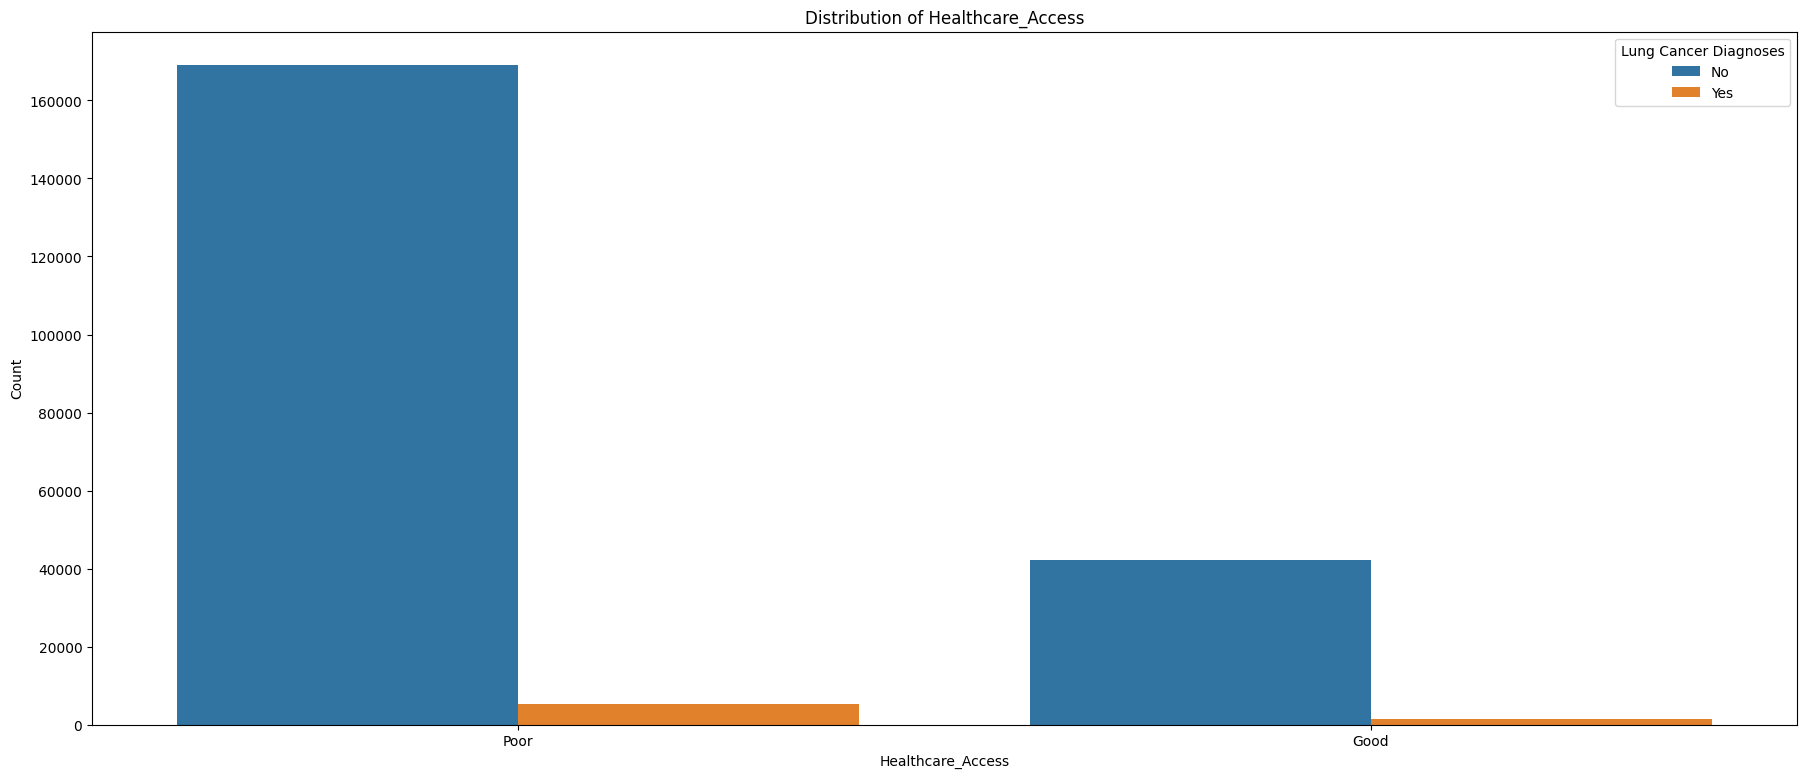

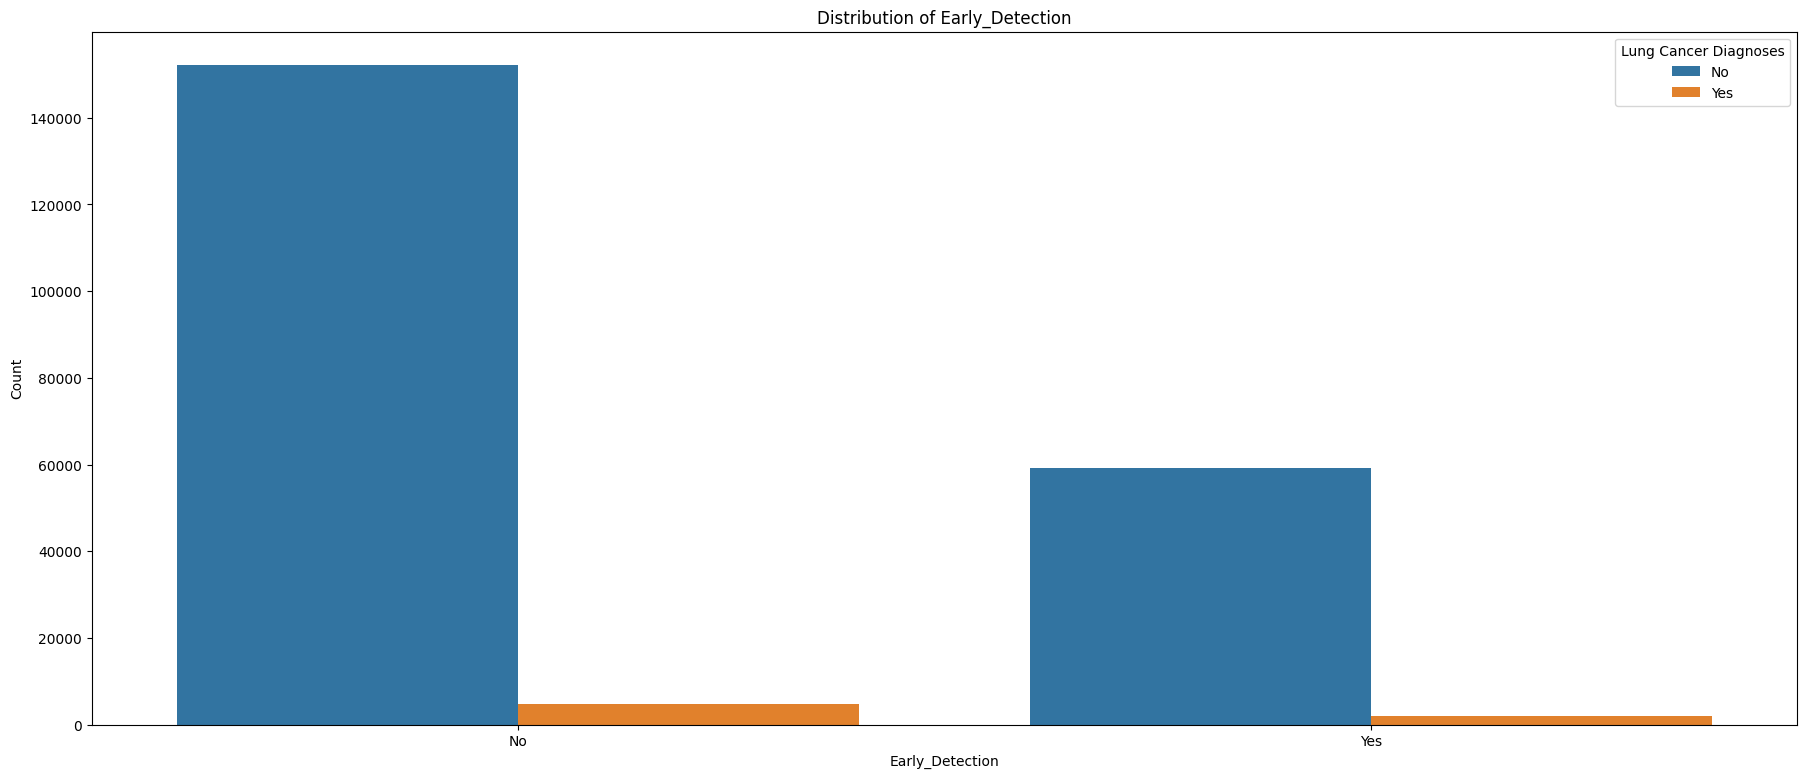

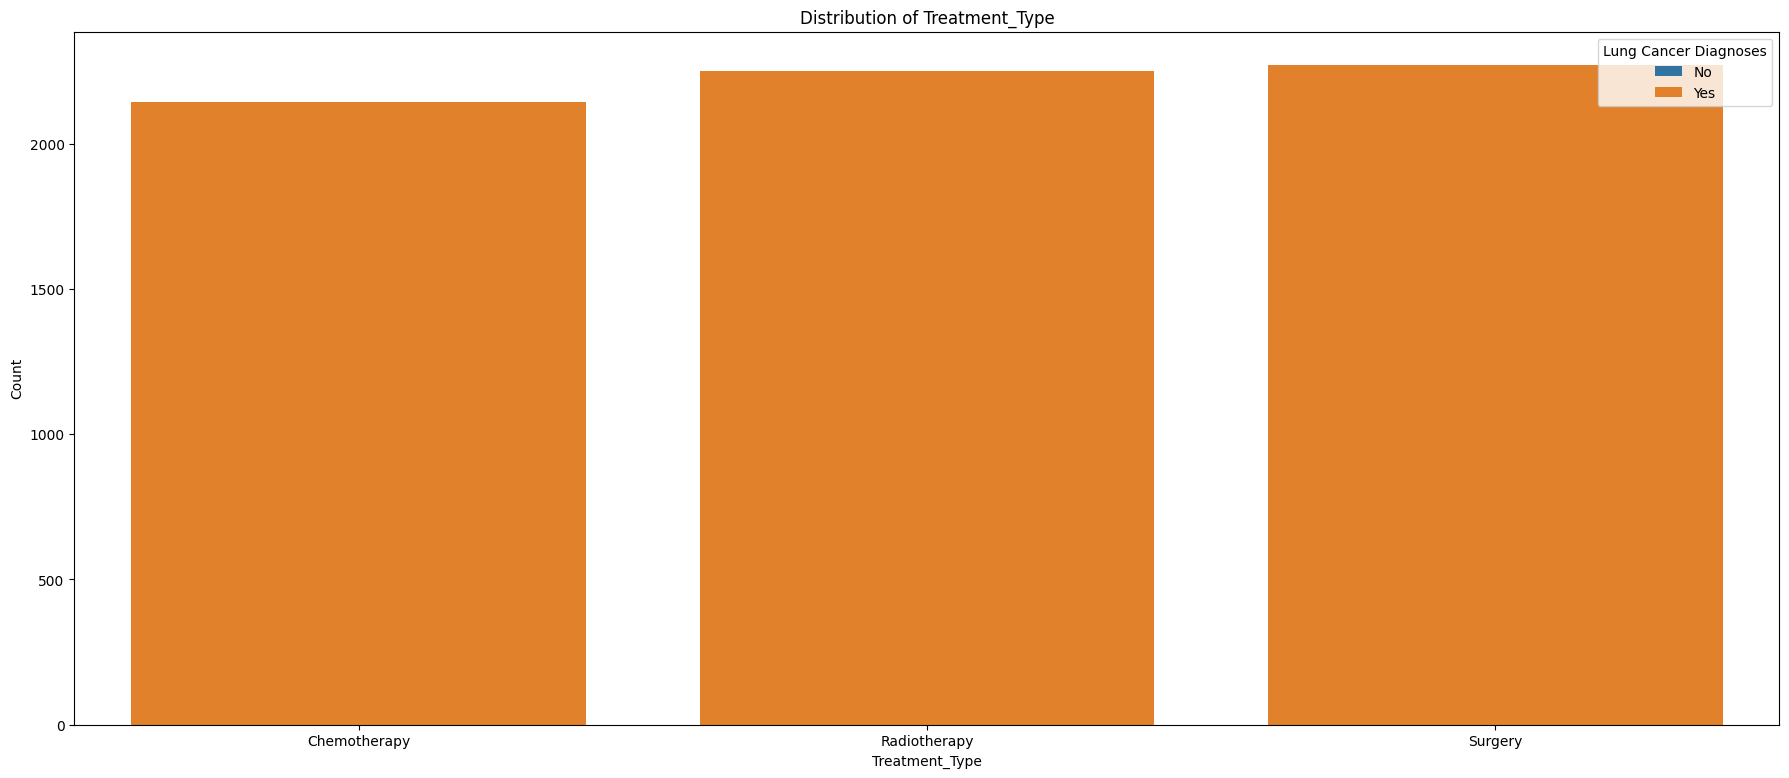

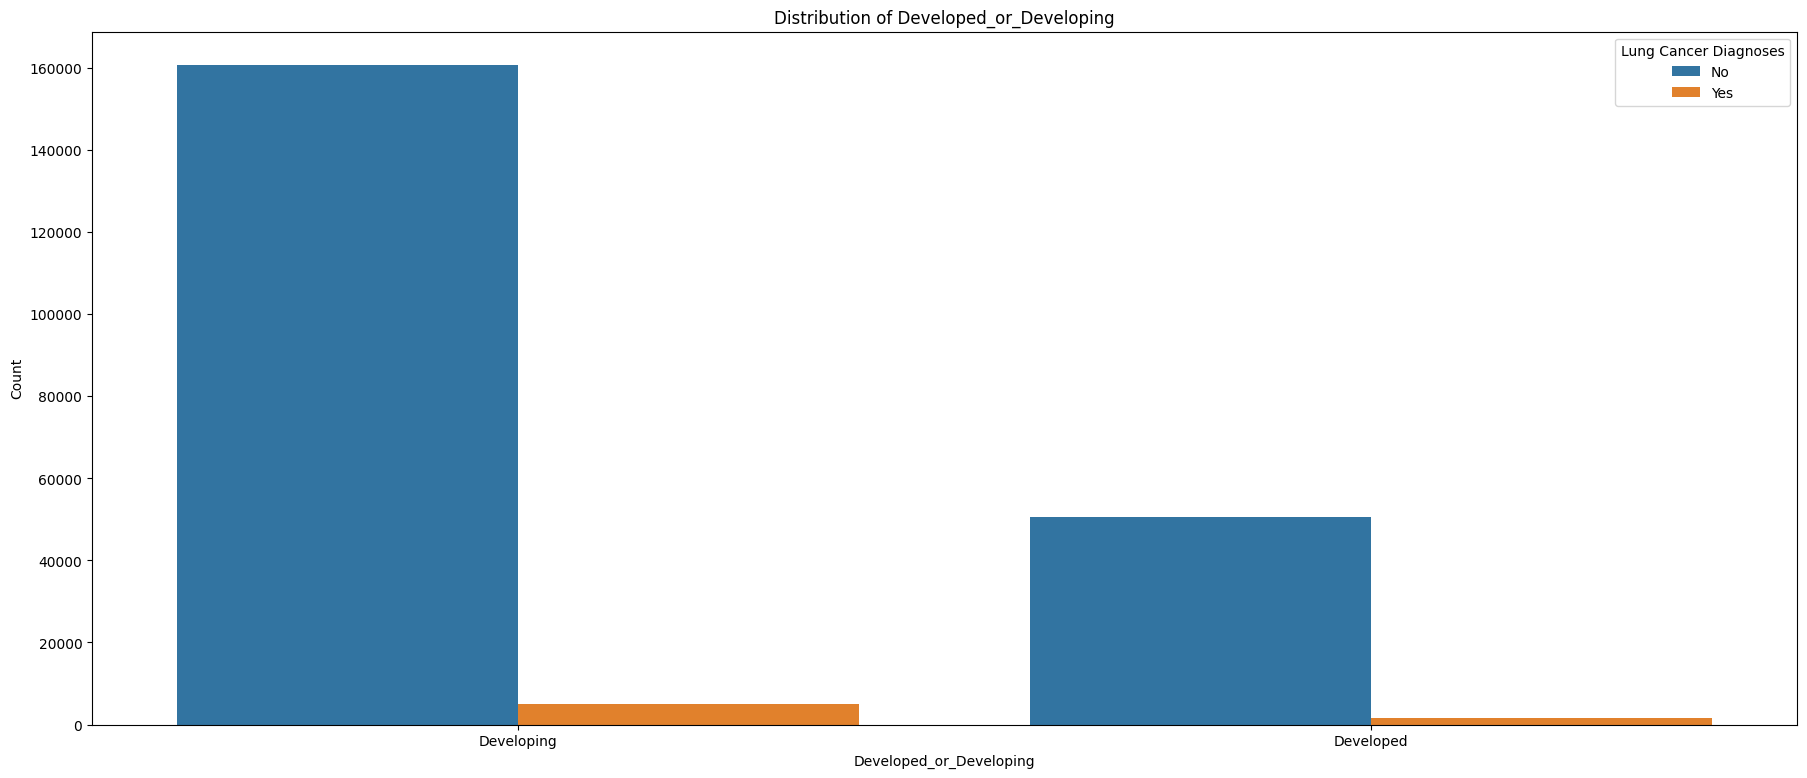

In [93]:
for col in cat_cols:
    plt.figure(figsize=(22,9))
    sns.countplot(data=df,x=col,hue='Lung_Cancer_Diagnosis')
    plt.title(f"Distribution of {col}")
    plt.xlabel(f'{col}')
    plt.ylabel('Count')
    plt.legend(title='Lung Cancer Diagnoses', labels=['No', 'Yes'], loc='upper right')
    plt.show()
    print('\n')

In [94]:
num_cols=df.select_dtypes(include=['number']).columns
num_cols

Index(['Population_Size', 'Age', 'Years_of_Smoking', 'Cigarettes_per_Day',
       'Survival_Years', 'Annual_Lung_Cancer_Deaths',
       'Lung_Cancer_Prevalence_Rate', 'Mortality_Rate'],
      dtype='object')

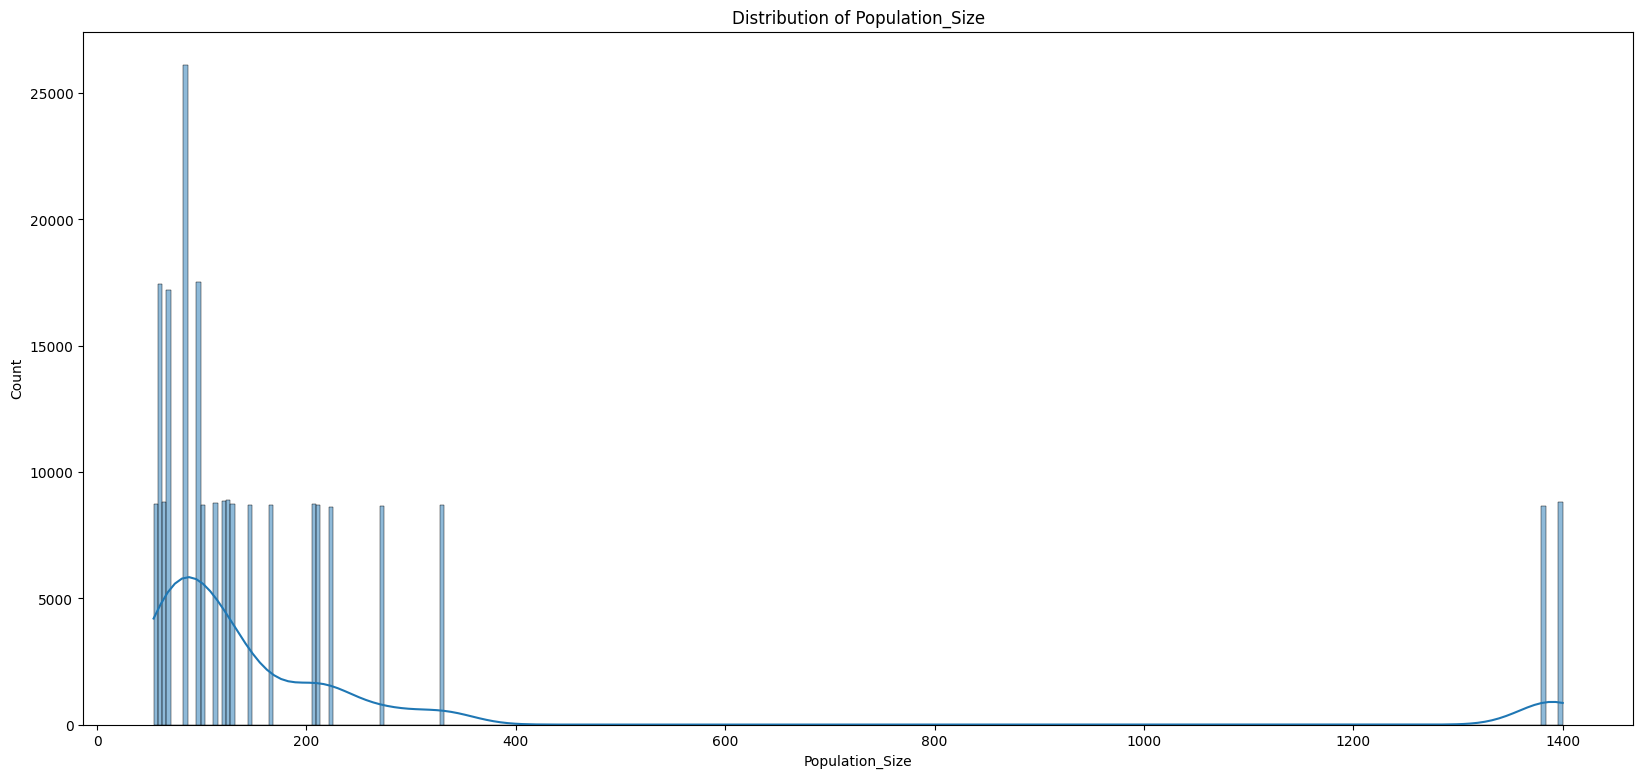

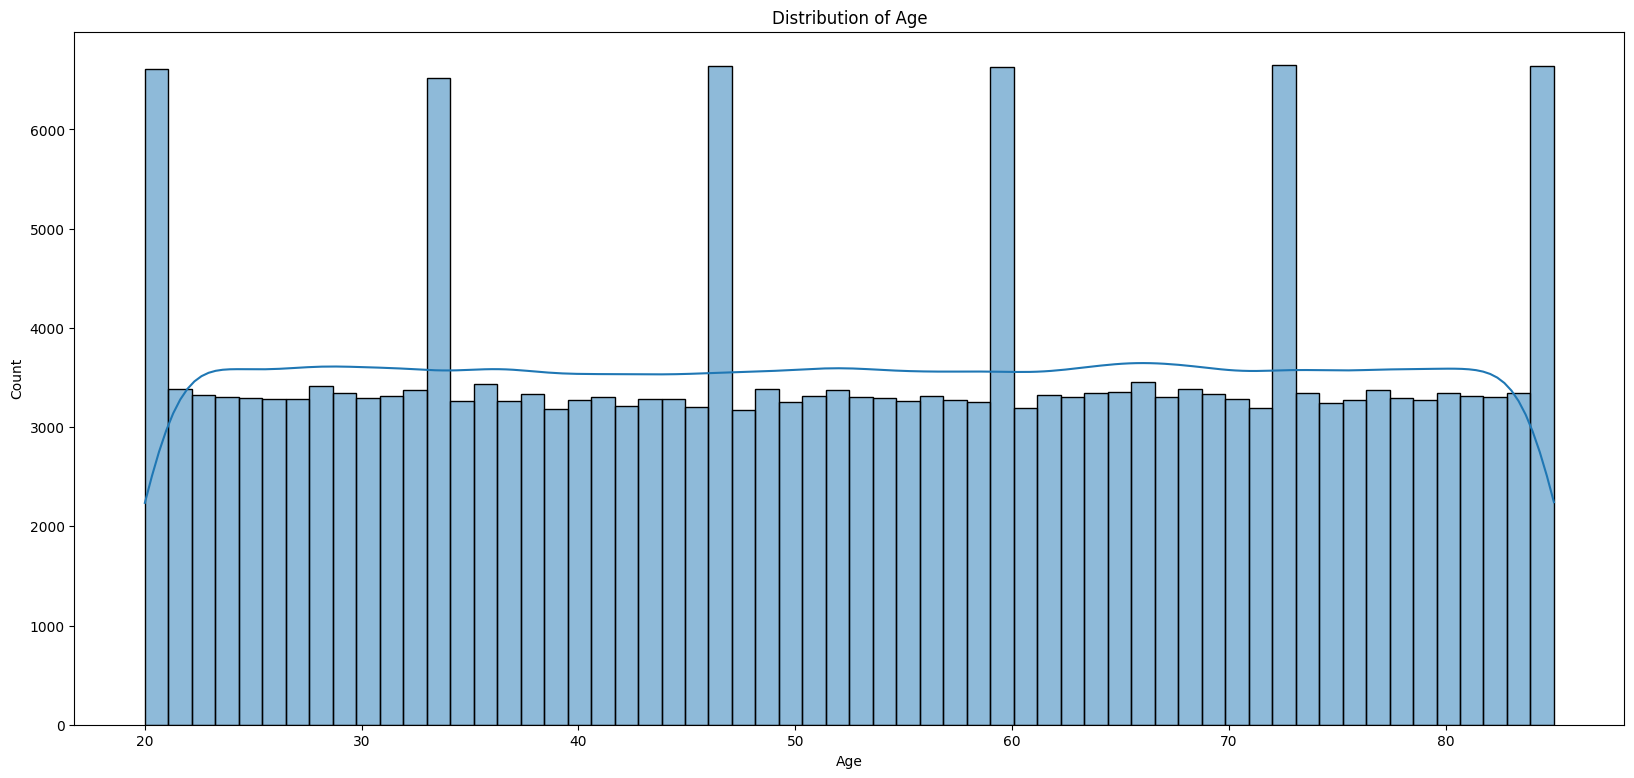

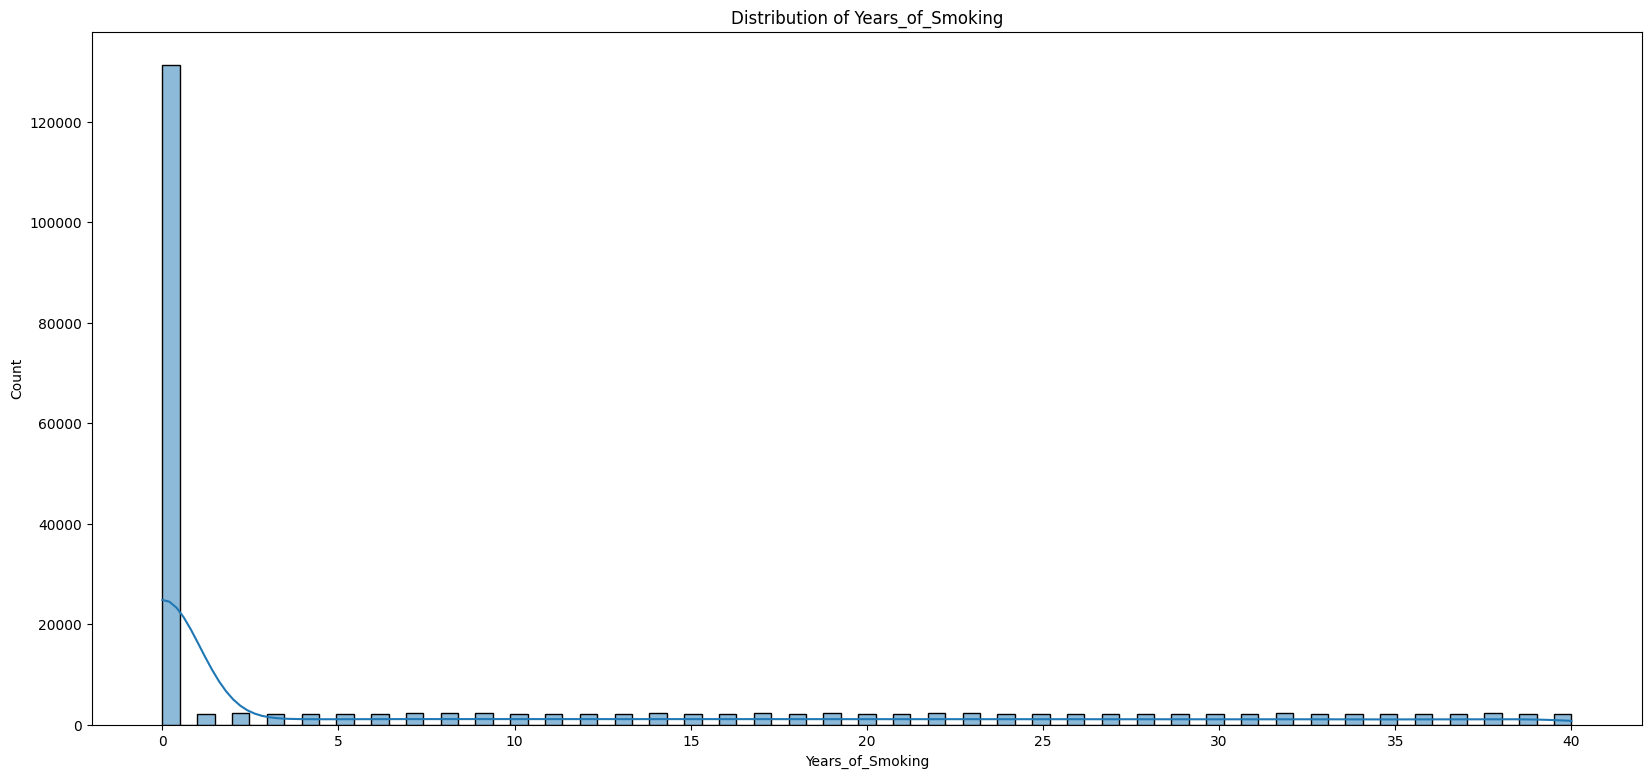

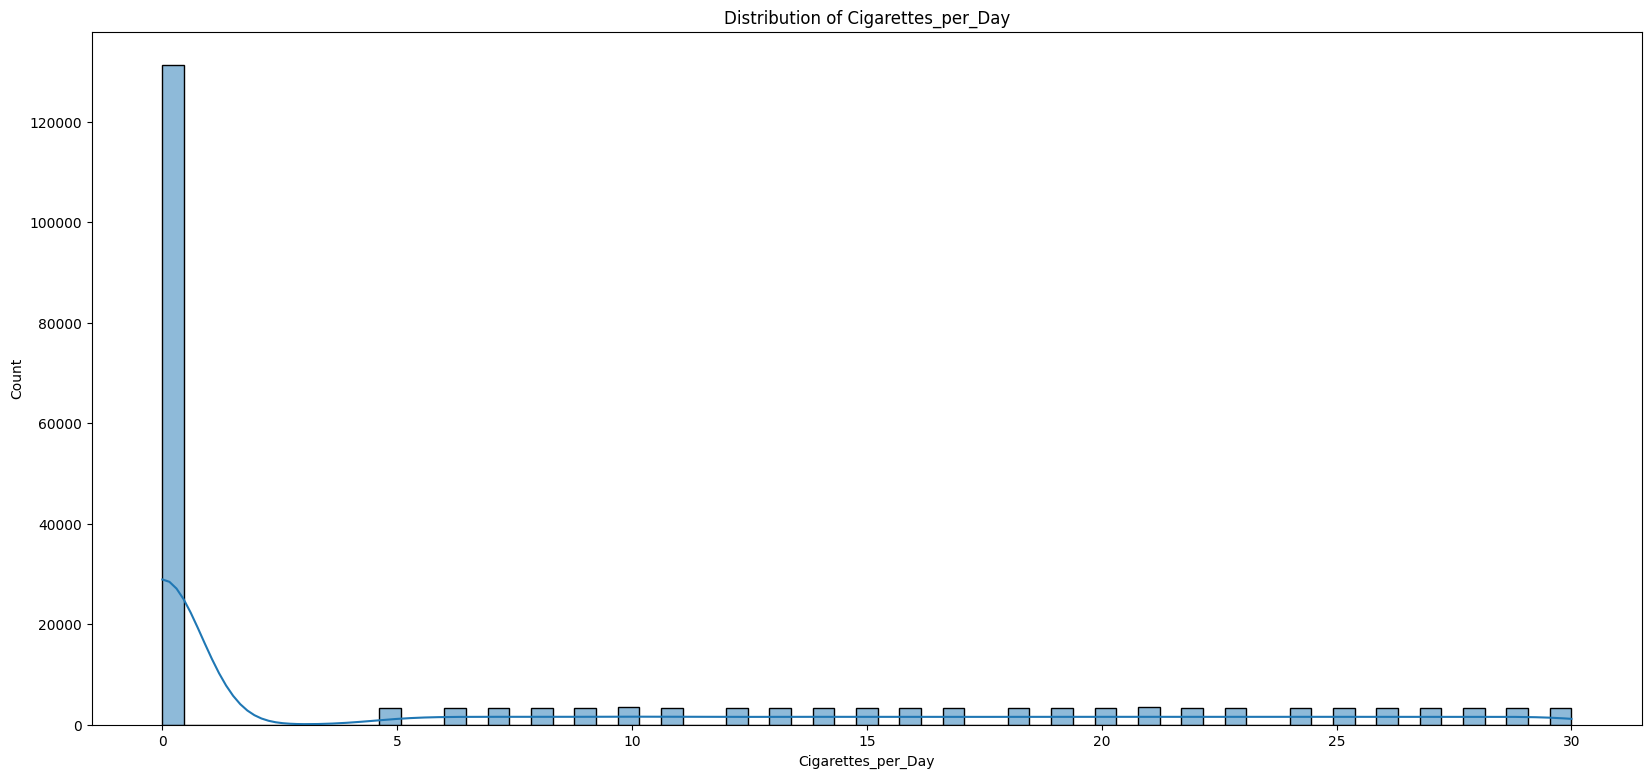

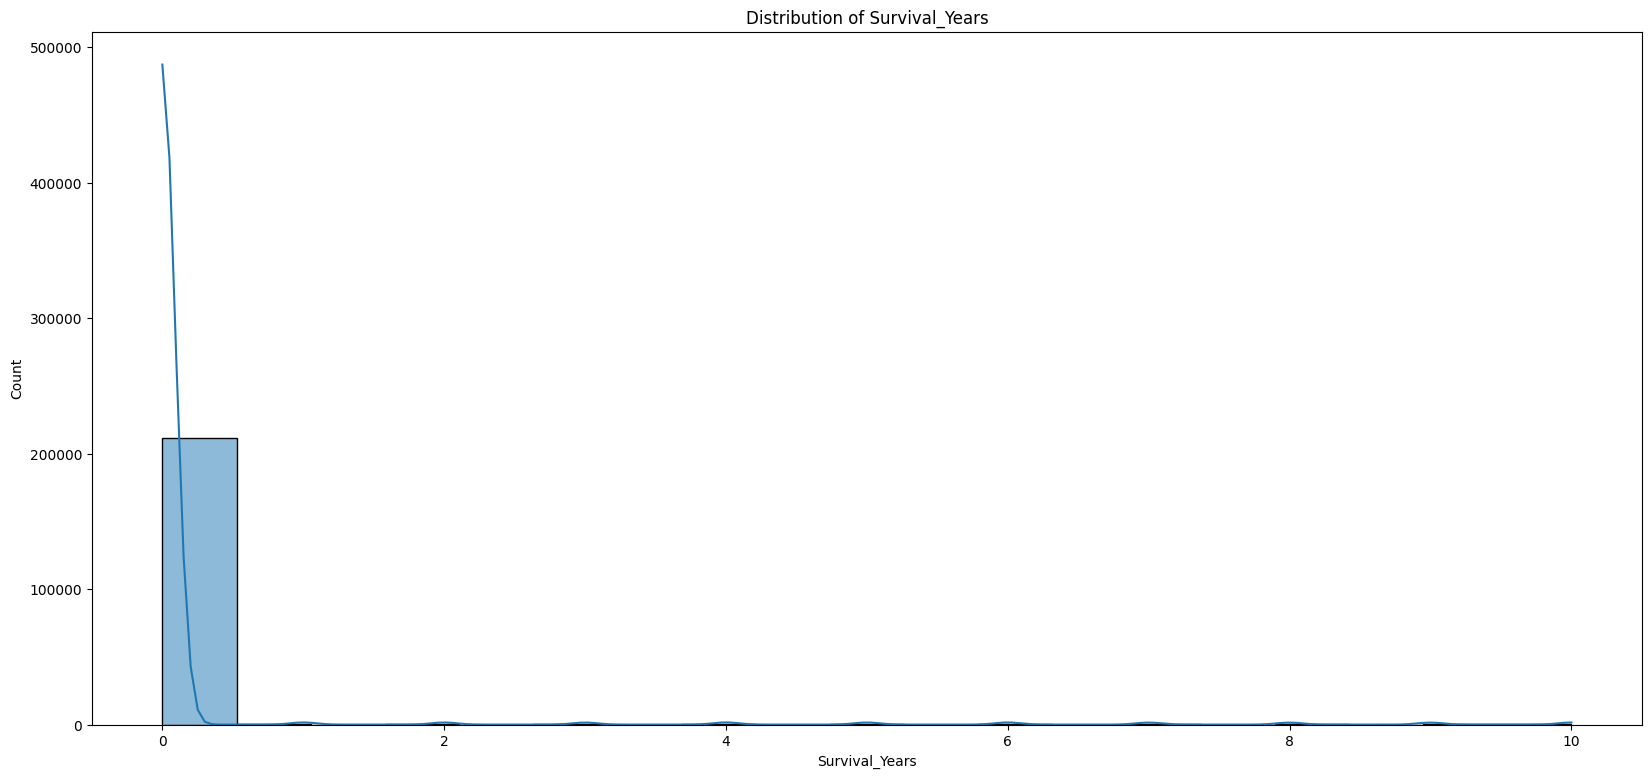

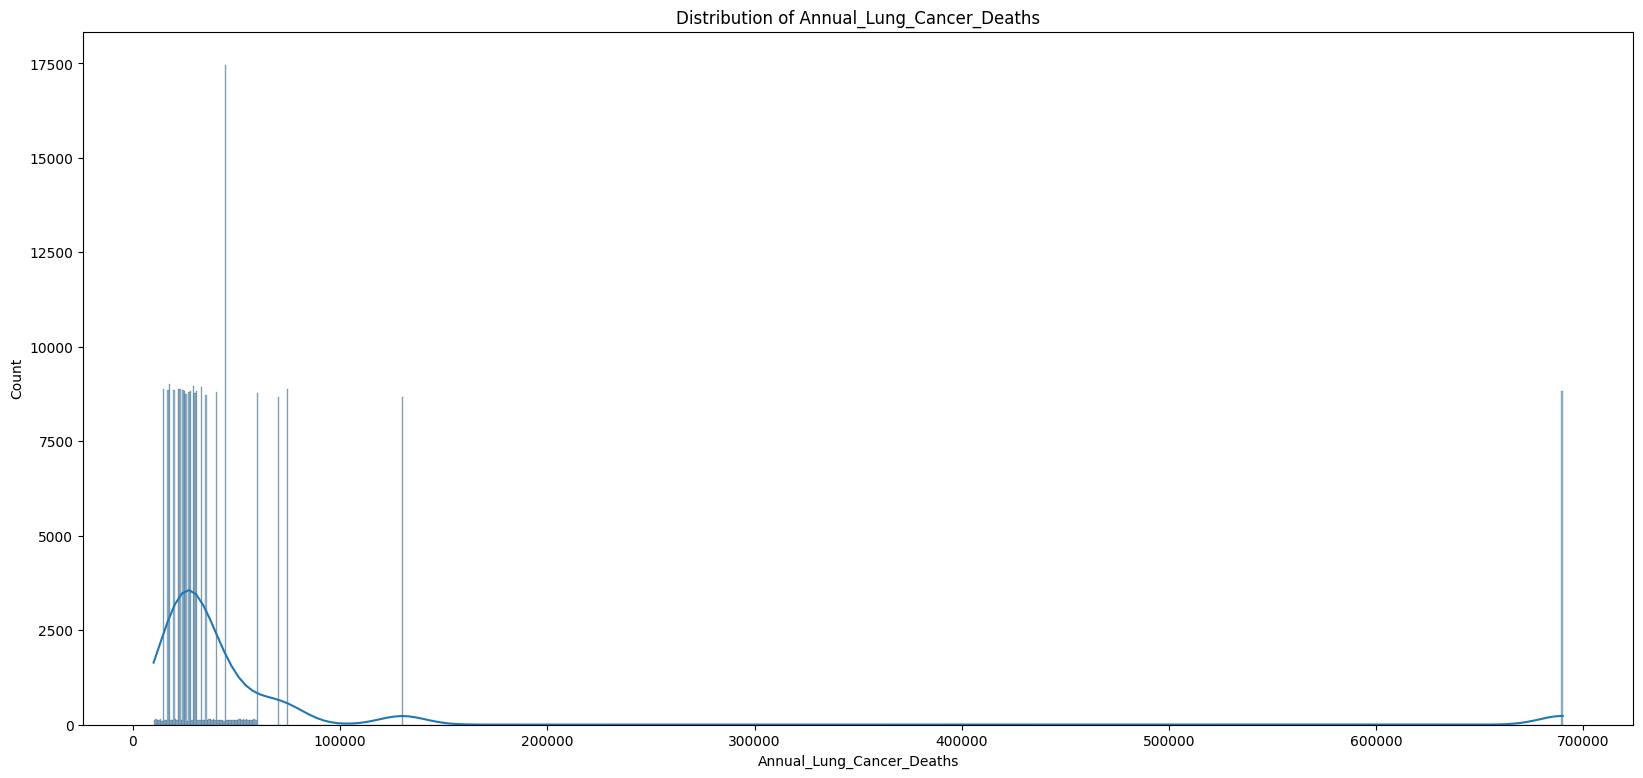

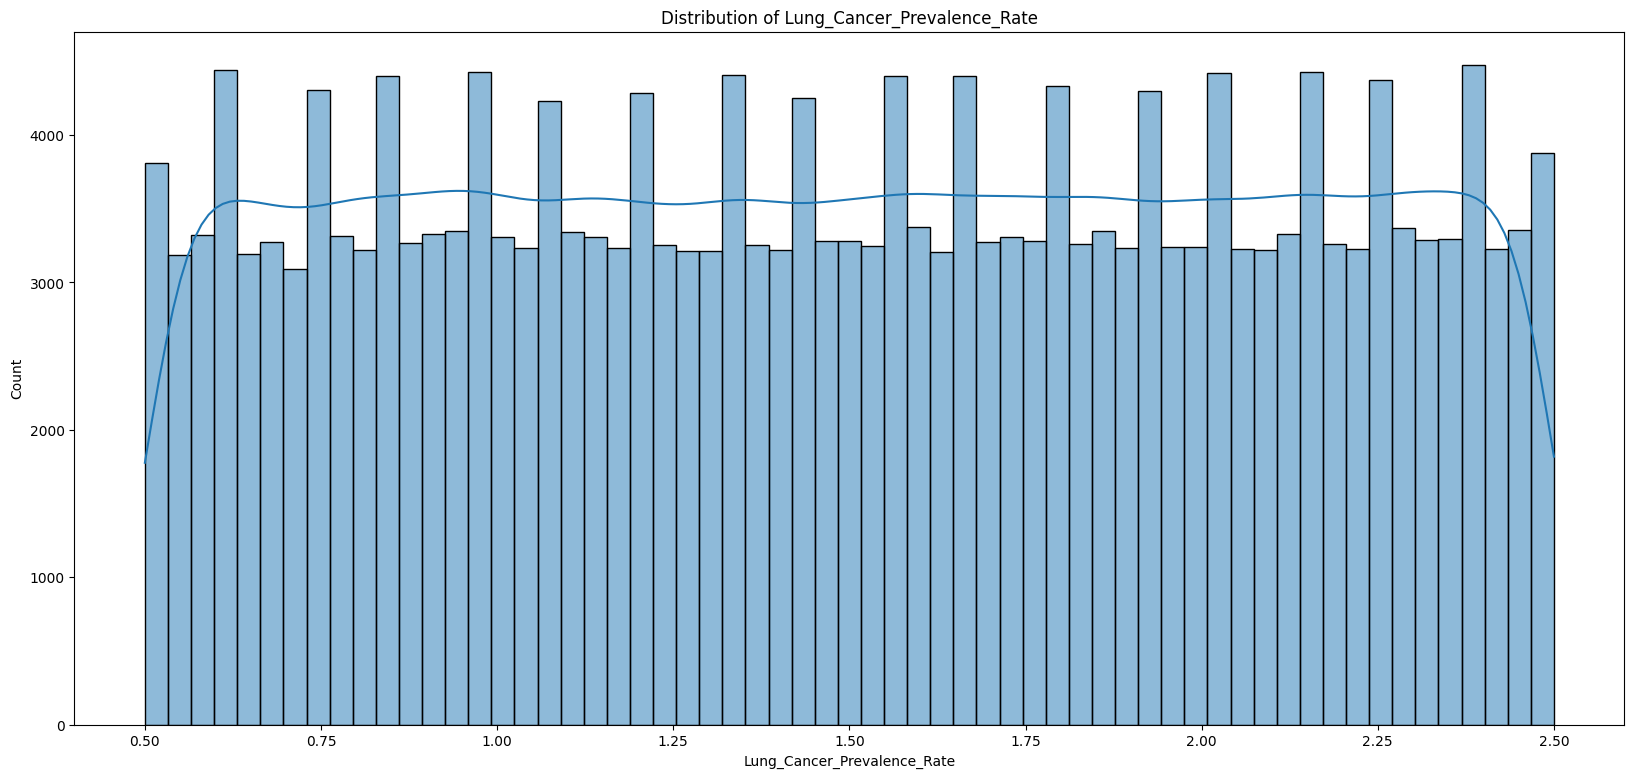

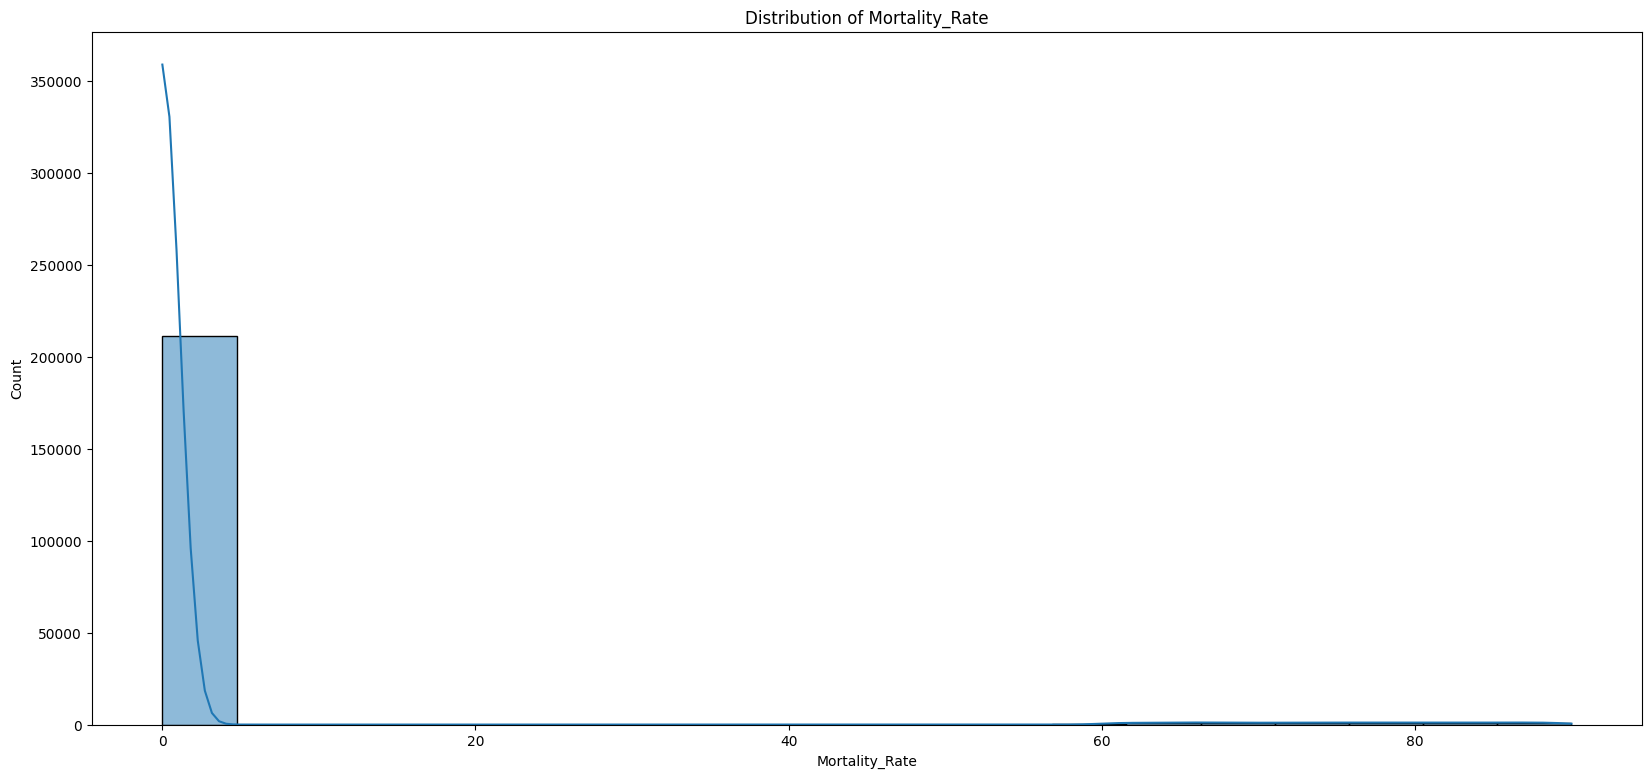

In [95]:
for col in num_cols:
    plt.figure(figsize=(20,9))
    sns.histplot(data=df,x=col,kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(f'{col}')
    plt.ylabel('Count')
    plt.show()
    print('\n')

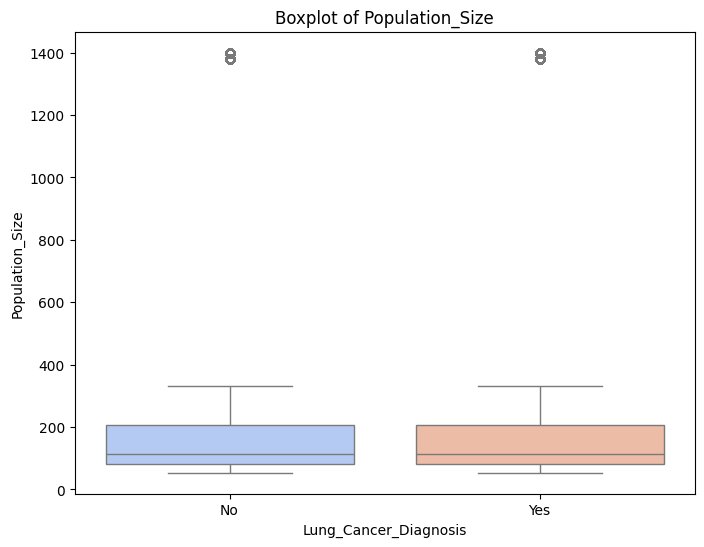

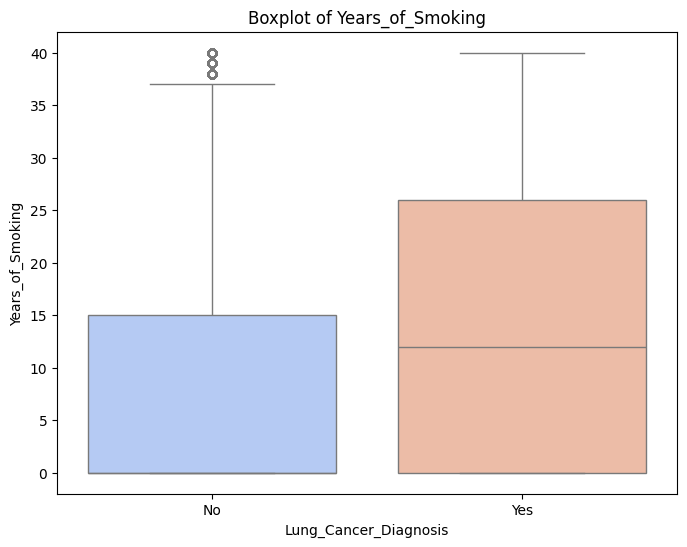

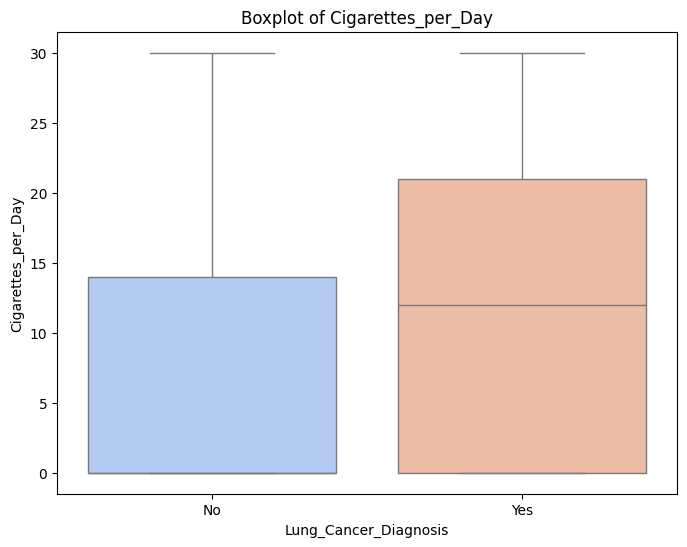

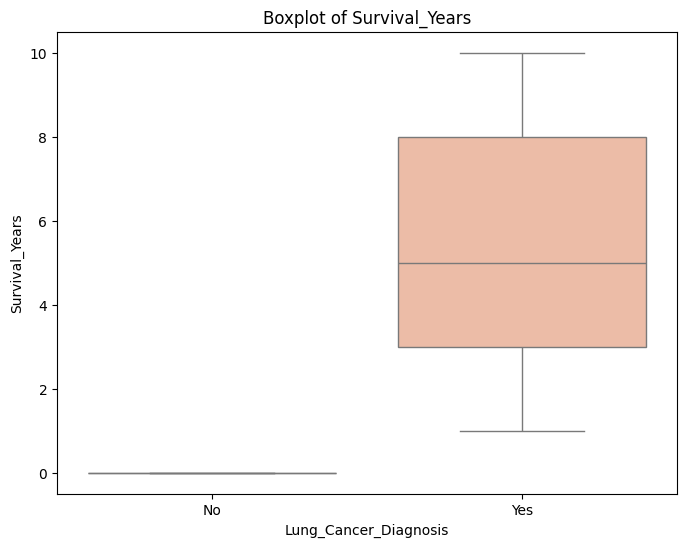

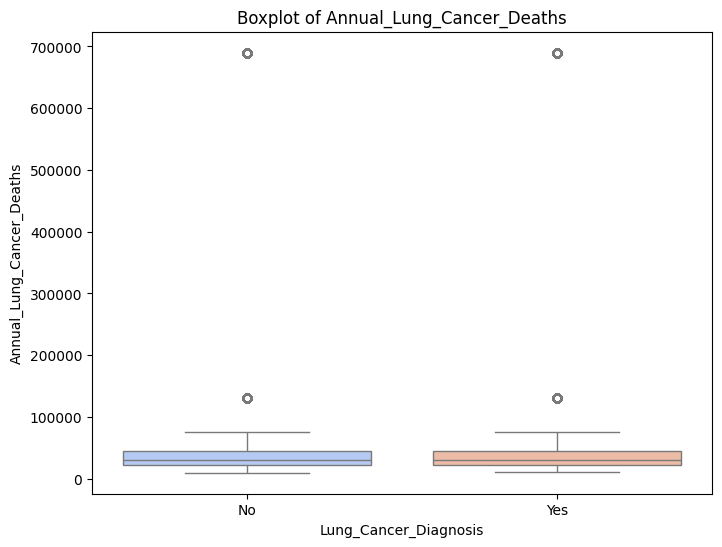

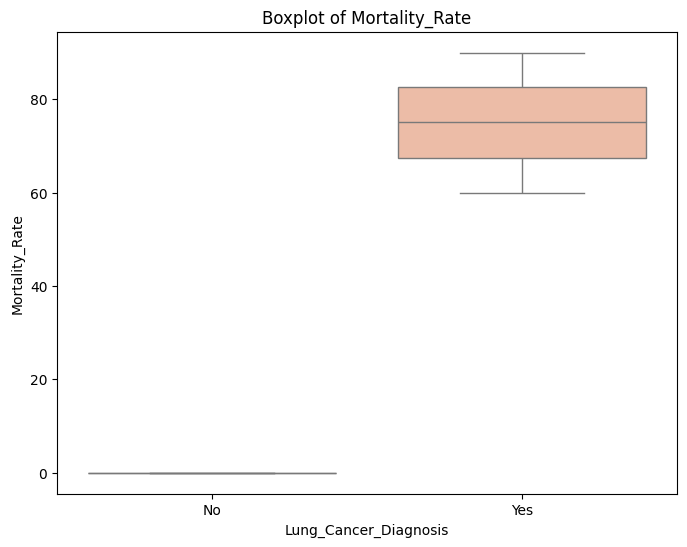

In [96]:
numeric_cols = ['Population_Size', 'Years_of_Smoking', 'Cigarettes_per_Day',
                'Survival_Years', 'Annual_Lung_Cancer_Deaths', 'Mortality_Rate']

for col in numeric_cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=df,x='Lung_Cancer_Diagnosis', y=col, palette='coolwarm',hue="Lung_Cancer_Diagnosis")
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

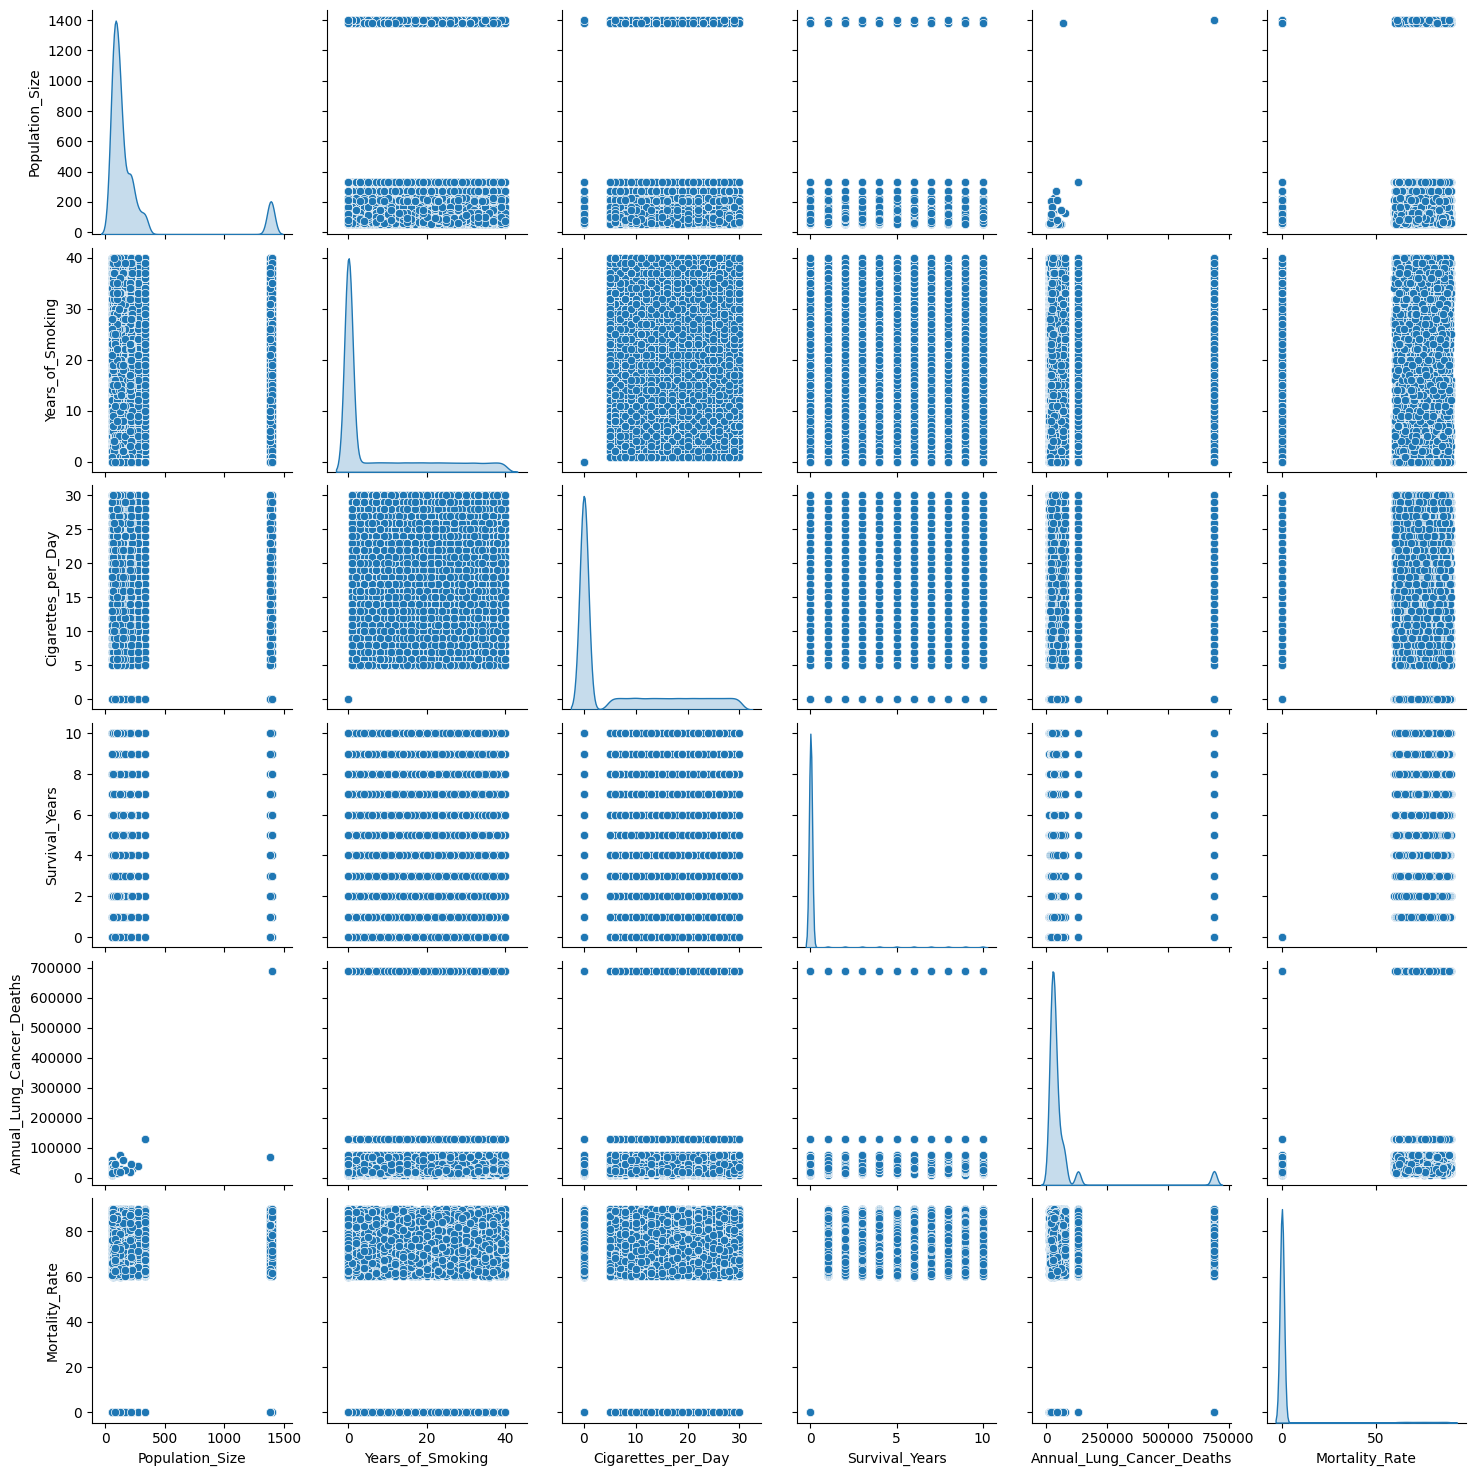

In [97]:
sns.pairplot(df[numeric_cols],kind='scatter',diag_kind='kde')
plt.show()

Handle Outliers

In [98]:
for col in df.drop(columns=cat_cols):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lowerBound = Q1 - IQR *1.5
    upperBound = Q3 + IQR * 1.5
    
    df[col] = np.where(df[col] > upperBound, upperBound, 
                       np.where(df[col] < lowerBound, upperBound, df[col]))

C:\Users\Rahma Ayman\AppData\Local\Temp\ipykernel_6776\3771115834.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] > upperBound, upperBound,
C:\Users\Rahma Ayman\AppData\Local\Temp\ipykernel_6776\3771115834.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] > upperBound, upperBound,
C:\Users\Rahma Ayman\AppData\Local\Temp\ipykernel_6776\3771115834.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

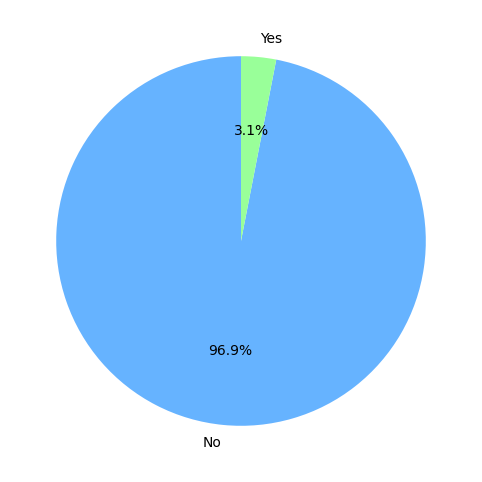

In [99]:
Lung_Cancer_count=df['Lung_Cancer_Diagnosis'].value_counts()
plt.figure(figsize=(12,6))
plt.pie(Lung_Cancer_count.values,labels=Lung_Cancer_count.index,autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.show()

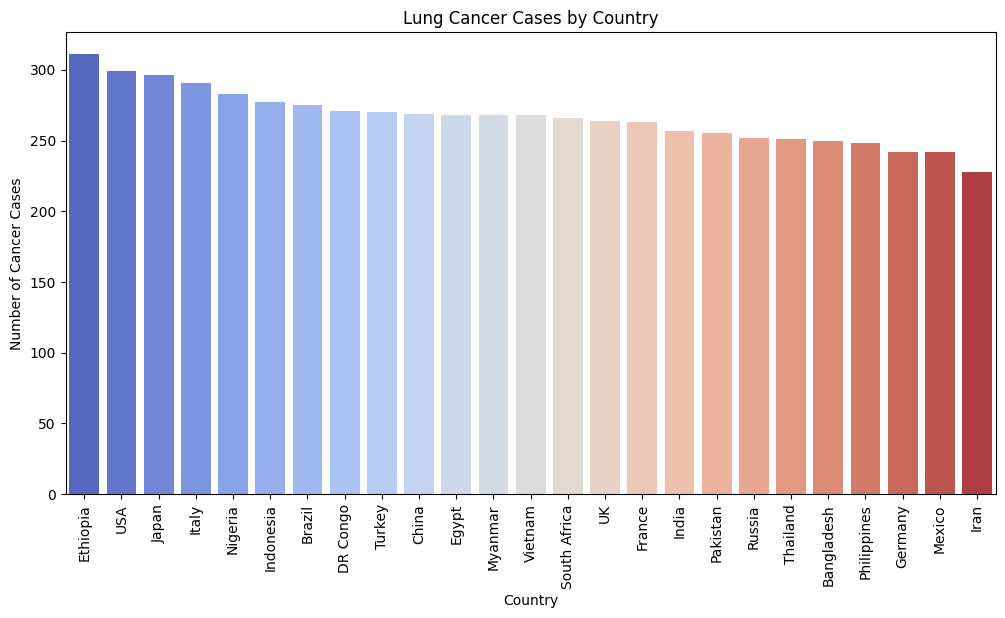

In [100]:
cancer_by_country = df[df['Lung_Cancer_Diagnosis'] == 'Yes']['Country'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=cancer_by_country.index,y=cancer_by_country.values,hue=cancer_by_country.index,palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Number of Cancer Cases")
plt.title("Lung Cancer Cases by Country")
plt.show()

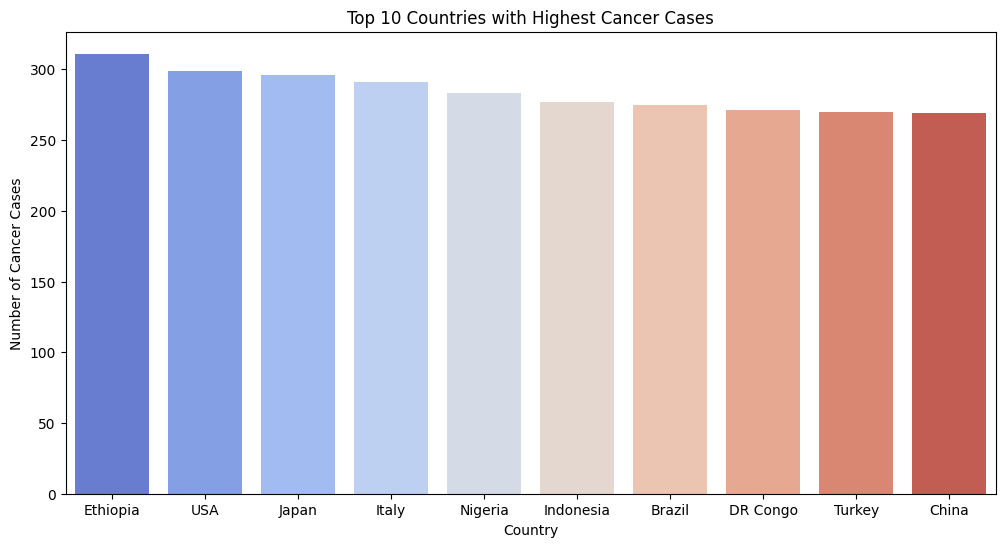

In [101]:
top_countries = df[df['Lung_Cancer_Diagnosis']=='Yes']['Country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values,hue=top_countries.index,palette='coolwarm')
plt.title('Top 10 Countries with Highest Cancer Cases')
plt.xlabel('Country')
plt.ylabel('Number of Cancer Cases')
plt.show()

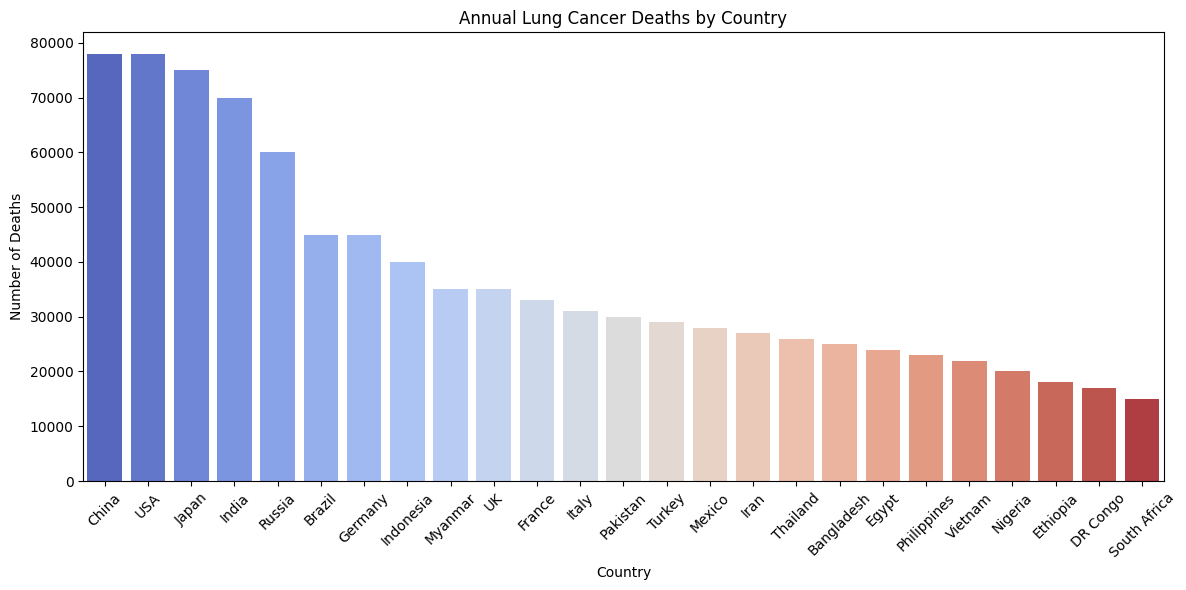

In [102]:
deaths_by_country = df.groupby('Country')['Annual_Lung_Cancer_Deaths'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=deaths_by_country.index, y=deaths_by_country.values,hue=deaths_by_country.index, palette='coolwarm')
plt.title('Annual Lung Cancer Deaths by Country')
plt.xlabel('Country')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Feature Engineering

Encoding Categorical Data

Mapping

In [103]:
# df['Gender'] = df['Gender'].map({'Male':0,'Female':1})
# df['Smoker']=df['Smoker'].map({'Yes':1,'No':0})
# df['Passive_Smoker']=df['Passive_Smoker'].map({'Yes':1,'No':0})
# df['Family_History']= df['Family_History'].map({'Yes':1,'No':0})
# df['Lung_Cancer_Diagnosis']=df['Lung_Cancer_Diagnosis'].map({'Yes':1,'No':0})
# df['Early_Detection']=df['Early_Detection'].map({'Yes':1,'No':0})
# df['Occupational_Exposure']=df['Occupational_Exposure'].map({'Yes':1,'No':0})
# df['Indoor_Pollution']=df['Indoor_Pollution'].map({'Yes':1,'No':0})


Label Encoding

In [104]:
# categorical_data = df.select_dtypes(include=['object']).columns
# le = LabelEncoder()
# for col in categorical_data:
#     df[col] = le.fit_transform(df[col])

correlation With Features

In [105]:
# plt.figure(figsize=(14,10))
# sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm",fmt='0.2f')
# plt.show()

In [106]:
# from sklearn.ensemble import RandomForestClassifier
# X=df.drop(columns=['Lung_Cancer_Diagnosis'])
# model = RandomForestClassifier()
# model.fit(X, df['Lung_Cancer_Diagnosis'])
# importances = pd.Series(model.feature_importances_, index=X.columns)
# print(importances.sort_values(ascending=False))

Correlation

In [107]:
# plt.figure(figsize=(14,10))
# sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm",fmt='0.2f')
# plt.show()

Feature Selection

In [108]:
# df.drop(columns=['Age','Passive_Smoker','Air_Pollution_Exposure'],inplace=True)

Correlation

In [109]:
# plt.figure(figsize=(14,10))
# sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm",fmt='0.2f')
# plt.show()

In [110]:
df.columns

Index(['Country', 'Population_Size', 'Age', 'Gender', 'Smoker',
       'Years_of_Smoking', 'Cigarettes_per_Day', 'Passive_Smoker',
       'Family_History', 'Lung_Cancer_Diagnosis', 'Cancer_Stage',
       'Survival_Years', 'Adenocarcinoma_Type', 'Air_Pollution_Exposure',
       'Occupational_Exposure', 'Indoor_Pollution', 'Healthcare_Access',
       'Early_Detection', 'Treatment_Type', 'Developed_or_Developing',
       'Annual_Lung_Cancer_Deaths', 'Lung_Cancer_Prevalence_Rate',
       'Mortality_Rate'],
      dtype='object')

In [111]:
# sns.boxplot(data=df,x='Lung_Cancer_Diagnosis',y='Cigarettes_per_Day')
# plt.show()

In [112]:
# sns.boxplot(data=df,x='Lung_Cancer_Diagnosis',y='Years_of_Smoking')
# plt.show()

In [113]:
df.columns

Index(['Country', 'Population_Size', 'Age', 'Gender', 'Smoker',
       'Years_of_Smoking', 'Cigarettes_per_Day', 'Passive_Smoker',
       'Family_History', 'Lung_Cancer_Diagnosis', 'Cancer_Stage',
       'Survival_Years', 'Adenocarcinoma_Type', 'Air_Pollution_Exposure',
       'Occupational_Exposure', 'Indoor_Pollution', 'Healthcare_Access',
       'Early_Detection', 'Treatment_Type', 'Developed_or_Developing',
       'Annual_Lung_Cancer_Deaths', 'Lung_Cancer_Prevalence_Rate',
       'Mortality_Rate'],
      dtype='object')